In [8]:
import pandas as pd
import pickle
from pathlib import Path
from collections import namedtuple
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

# Display more rows and get rid of the margins
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth',500)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from statsmodels.stats.multitest import multipletests

# Display mulitiple values from each cell
# https://stackoverflow.com/a/42476224
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [9]:
from abcd_helpers import resproc as rp

In [10]:
data_dir = Path('data')
swarm_out_dir = Path('bootstrap/single_runs')
res_dir = swarm_out_dir
data_out_dir = Path('bootstrap')

In [4]:
#ModPermRes = namedtuple("ModPermRes",['pn','fn','name', 'clf', 'ho_score','cfn'])
#VarPermRes = namedtuple("VarPermRes", ["pn", "metric", "int_r2", "agh_r2", "aghs_r2", "aghss_r2", "aghsss_r2"])

In [11]:
#con_pks = sorted(list(res_dir.glob('pn*_con.pkz')))
crt_pks = sorted(list(res_dir.glob('pn*_crt_*.pkz')))
bs_crt_pks = sorted(list(res_dir.glob('bs*_crt_*.pkz')))

# Task based

In [12]:
bad_files = []
crt_mod_res = []
crt_var_res = []
crt_cb_var_res = []
print("Pickles to load: ", len(crt_pks))
for ii, pk in enumerate(crt_pks):
    pn, task, contrast = rp.get_crt(pk)
    try:
        with open(pk, 'rb') as h:
            pkr = pickle.load(h)
    except EOFError:
        print('BAD FILE:', pk)
        bad_files.append(pk)
        continue
    mod_res_cols = ['pn', 'fn', 'name', 'ho_score', 'cfn', 'coef']
    tmp_mod = pd.DataFrame(pkr[0])
    tmp_mod['coef'] = [clf.coef_ for clf in tmp_mod.clf]
    crt_mod_res.append(tmp_mod.loc[:,mod_res_cols].assign(**{'task': task, 'contrast':contrast}))
    crt_var_res.append(pd.DataFrame(pkr[1]).assign(**{'task': task, 'contrast':contrast}))
    crt_cb_var_res.append(pd.DataFrame(pkr[2]).assign(**{'task': task, 'contrast':contrast}))
    if ii % 500 == 0:
        print(ii, task, contrast, pn, flush=True)
        
crt_mod_res = pd.concat(crt_mod_res, ignore_index=True)
crt_var_res = pd.concat(crt_var_res, ignore_index=True)
crt_cb_var_res = pd.concat(crt_cb_var_res, ignore_index=True)

Pickles to load:  26026
0 mid antic.large.loss.vs.neutral.pkz 0
500 mid antic.small.loss.vs.neutral.pkz 19
1000 nback 2.back.vs.0.back.pkz 38
1500 nback posface.vs.neutface.pkz 57
2000 sst incorrect.go.vs.incorrect.stop.pkz 76
2500 mid antic.loss.vs.neutral.pkz 96
3000 nback 0.back.pkz 115
3500 nback negface.vs.neutface.pkz 134
4000 sst correct.stop.vs.incorrect.stop.pkz 153
4500 mid antic.large.vs.small.loss.pkz 173
5000 mid loss.pos.vs.neg.feedback.pkz 192
5500 nback emotion.vs.neutface.pkz 211
6000 sst correct.go.vs.fixation.pkz 230
6500 mid antic.large.loss.vs.neutral.pkz 250
7000 mid antic.small.loss.vs.neutral.pkz 269
7500 nback 2.back.vs.0.back.pkz 288
8000 nback posface.vs.neutface.pkz 307
8500 sst incorrect.go.vs.incorrect.stop.pkz 326
9000 mid antic.loss.vs.neutral.pkz 346
9500 nback 0.back.pkz 365
10000 nback negface.vs.neutface.pkz 384
10500 sst correct.stop.vs.incorrect.stop.pkz 403
11000 mid antic.large.vs.small.loss.pkz 423
11500 mid loss.pos.vs.neg.feedback.pkz 442
1200

In [13]:
bad_files = []
bs_crt_mod_res = []
bs_crt_var_res = []
bs_crt_cb_var_res = []
print("Pickles to load: ", len(bs_crt_pks))
for ii, pk in enumerate(bs_crt_pks):
    pn, task, contrast = rp.get_crt(pk)
    try:
        with open(pk, 'rb') as h:
            pkr = pickle.load(h)
    except EOFError:
        print('BAD FILE:', pk)
        bad_files.append(pk)
        continue
    mod_res_cols = ['pn', 'fn', 'name', 'ho_score', 'cfn', 'coef']
    tmp_mod = pd.DataFrame(pkr[0])
    tmp_mod['coef'] = [clf.coef_ for clf in tmp_mod.clf]
    bs_crt_mod_res.append(tmp_mod.loc[:,mod_res_cols].assign(**{'task': task, 'contrast':contrast}))
    bs_crt_var_res.append(pd.DataFrame(pkr[1]).assign(**{'task': task, 'contrast':contrast}))
    bs_crt_cb_var_res.append(pd.DataFrame(pkr[2]).assign(**{'task': task, 'contrast':contrast}))
    if ii % 500 == 0:
        print(ii, task, contrast, pn, flush=True)
        
bs_crt_mod_res = pd.concat(bs_crt_mod_res, ignore_index=True)
bs_crt_var_res = pd.concat(bs_crt_var_res, ignore_index=True)
bs_crt_cb_var_res = pd.concat(bs_crt_cb_var_res, ignore_index=True)

Pickles to load:  260000
0 mid antic.large.loss.vs.neutral.pkz 0
500 mid antic.small.loss.vs.neutral.pkz 19
1000 nback 2.back.vs.0.back.pkz 38
1500 nback posface.vs.neutface.pkz 57
2000 sst incorrect.go.vs.incorrect.stop.pkz 76
2500 mid antic.loss.vs.neutral.pkz 96
3000 nback 0.back.pkz 115
3500 nback negface.vs.neutface.pkz 134
4000 sst correct.stop.vs.incorrect.stop.pkz 153
4500 mid antic.large.vs.small.loss.pkz 173
5000 mid loss.pos.vs.neg.feedback.pkz 192
5500 nback emotion.vs.neutface.pkz 211
6000 sst correct.go.vs.fixation.pkz 230
6500 mid antic.large.loss.vs.neutral.pkz 250
7000 mid antic.small.loss.vs.neutral.pkz 269
7500 nback 2.back.vs.0.back.pkz 288
8000 nback posface.vs.neutface.pkz 307
8500 sst incorrect.go.vs.incorrect.stop.pkz 326
9000 mid antic.loss.vs.neutral.pkz 346
9500 nback 0.back.pkz 365
10000 nback negface.vs.neutface.pkz 384
10500 sst correct.stop.vs.incorrect.stop.pkz 403
11000 mid antic.large.vs.small.loss.pkz 423
11500 mid loss.pos.vs.neg.feedback.pkz 442
120

101000 nback negface.vs.neutface.pkz 3884
101500 sst correct.stop.vs.incorrect.stop.pkz 3903
102000 mid antic.large.vs.small.loss.pkz 3923
102500 mid loss.pos.vs.neg.feedback.pkz 3942
103000 nback emotion.vs.neutface.pkz 3961
103500 sst correct.go.vs.fixation.pkz 3980
104000 mid antic.large.loss.vs.neutral.pkz 4000
104500 mid antic.small.loss.vs.neutral.pkz 4019
105000 nback 2.back.vs.0.back.pkz 4038
105500 nback posface.vs.neutface.pkz 4057
106000 sst incorrect.go.vs.incorrect.stop.pkz 4076
106500 mid antic.loss.vs.neutral.pkz 4096
107000 nback 0.back.pkz 4115
107500 nback negface.vs.neutface.pkz 4134
108000 sst correct.stop.vs.incorrect.stop.pkz 4153
108500 mid antic.large.vs.small.loss.pkz 4173
109000 mid loss.pos.vs.neg.feedback.pkz 4192
109500 nback emotion.vs.neutface.pkz 4211
110000 sst correct.go.vs.fixation.pkz 4230
110500 mid antic.large.loss.vs.neutral.pkz 4250
111000 mid antic.small.loss.vs.neutral.pkz 4269
111500 nback 2.back.vs.0.back.pkz 4288
112000 nback posface.vs.neut

195000 mid antic.large.loss.vs.neutral.pkz 7500
195500 mid antic.small.loss.vs.neutral.pkz 7519
196000 nback 2.back.vs.0.back.pkz 7538
196500 nback posface.vs.neutface.pkz 7557
197000 sst incorrect.go.vs.incorrect.stop.pkz 7576
197500 mid antic.loss.vs.neutral.pkz 7596
198000 nback 0.back.pkz 7615
198500 nback negface.vs.neutface.pkz 7634
199000 sst correct.stop.vs.incorrect.stop.pkz 7653
199500 mid antic.large.vs.small.loss.pkz 7673
200000 mid loss.pos.vs.neg.feedback.pkz 7692
200500 nback emotion.vs.neutface.pkz 7711
201000 sst correct.go.vs.fixation.pkz 7730
201500 mid antic.large.loss.vs.neutral.pkz 7750
202000 mid antic.small.loss.vs.neutral.pkz 7769
202500 nback 2.back.vs.0.back.pkz 7788
203000 nback posface.vs.neutface.pkz 7807
203500 sst incorrect.go.vs.incorrect.stop.pkz 7826
204000 mid antic.loss.vs.neutral.pkz 7846
204500 nback 0.back.pkz 7865
205000 nback negface.vs.neutface.pkz 7884
205500 sst correct.stop.vs.incorrect.stop.pkz 7903
206000 mid antic.large.vs.small.loss.pkz

In [14]:
crt_mod_res['label'] = crt_mod_res.contrast
bs_crt_mod_res['label'] = bs_crt_mod_res.contrast

In [ ]:
# Save results to consolidated pickles
crt_mod_res.to_pickle('crt_mod_seperate_100_beta.pkz.gz')
bs_crt_mod_res.to_pickle('bs_crt_mod_seperate_100_beta.pkz.gz')
crt_var_res.to_pickle('crt_var_res_seperate_100.pkz.gz')
crt_cb_var_res.to_pickle('crt_cb_var_res_seperate_100.pkz.gz')
bs_crt_var_res.to_pickle('bs_crt_var_res_seperate_100.pkz.gz')
bs_crt_cb_var_res.to_pickle('bs_crt_cb_var_res_seperate_100.pkz.gz')

In [ ]:
#crt_mod_res = pd.read_pickle('crt_mod_100.pkz')
#crt_var_res = pd.read_pickle('crt_var_res_100.pkz')
#crt_cb_var_res = pd.read_pickle('crt_cb_var_res_100.pkz')

In [15]:
expected_pns = set(np.arange(0, crt_mod_res.pn.max()))
missing_ps = {}
for x,df in crt_mod_res.groupby('label'):
    found_pns = set(df.pn.unique())
    if len(found_pns) < len(expected_pns):
        missing_ps[x]=expected_pns.difference(found_pns)
assert len(missing_ps) == 0

In [16]:
crt_mod_res.groupby(['label']).pn.nunique()


label
0.back.pkz                            1001
2.back.pkz                            1001
2.back.vs.0.back.pkz                  1001
antic.large.loss.vs.neutral.pkz       1001
antic.large.reward.vs.neutral.pkz     1001
antic.large.vs.small.loss.pkz         1001
antic.large.vs.small.reward.pkz       1001
antic.loss.vs.neutral.pkz             1001
antic.reward.vs.neutral.pkz           1001
antic.small.loss.vs.neutral.pkz       1001
antic.small.reward.vs.neutral.pkz     1001
any.stop.vs.correct.go.pkz            1001
correct.go.vs.fixation.pkz            1001
correct.stop.vs.correct.go.pkz        1001
correct.stop.vs.incorrect.stop.pkz    1001
emotion.pkz                           1001
emotion.vs.neutface.pkz               1001
face.vs.place.pkz                     1001
incorrect.go.vs.correct.go.pkz        1001
incorrect.go.vs.incorrect.stop.pkz    1001
incorrect.stop.vs.correct.go.pkz      1001
loss.pos.vs.neg.feedback.pkz          1001
negface.vs.neutface.pkz               1001
place

In [17]:
n_cr = len(crt_mod_res.label.unique())
complete_perms = (crt_mod_res.groupby('pn').label.nunique()==n_cr)
complete_perms = complete_perms[complete_perms].index.values

In [18]:
mod_names = ['normal', 'age_rsd']
cb_mod_names = ['combat', 'cbagersd']
crt_mod_res.loc[(crt_mod_res.name == 'normal') | (crt_mod_res.name == 'combat'), 'bal_proc'] = 'sex'
crt_mod_res.loc[(crt_mod_res.name == 'age_rsd') | (crt_mod_res.name == 'cbagersd'), 'bal_proc'] = 'age_rsd'
crt_mod_res.loc[(crt_mod_res.name == 'ab_normal') | (crt_mod_res.name == 'ab_combat'), 'bal_proc'] = 'age_bal'
crt_mod_res.loc[:, 'combat'] = False
crt_mod_res.loc[((crt_mod_res.name == 'combat') 
                    | (crt_mod_res.name == 'cbagersd') 
                    | (crt_mod_res.name == 'ab_combat')), 'combat'] = True


bs_crt_mod_res.loc[(bs_crt_mod_res.name == 'normal') | (bs_crt_mod_res.name == 'combat'), 'bal_proc'] = 'sex'
bs_crt_mod_res.loc[(bs_crt_mod_res.name == 'age_rsd') | (bs_crt_mod_res.name == 'cbagersd'), 'bal_proc'] = 'age_rsd'
bs_crt_mod_res.loc[(bs_crt_mod_res.name == 'ab_normal') | (bs_crt_mod_res.name == 'ab_combat'), 'bal_proc'] = 'age_bal'
bs_crt_mod_res.loc[:, 'combat'] = False
bs_crt_mod_res.loc[((bs_crt_mod_res.name == 'combat') 
                    | (bs_crt_mod_res.name == 'cbagersd') 
                    | (bs_crt_mod_res.name == 'ab_combat')), 'combat'] = True

In [19]:
crt_mod_to_plot = crt_mod_res.groupby(['task', 'contrast', 'pn', 'bal_proc', 'name'])[['ho_score']].agg(['mean' ,'std']).query('pn == 0').reset_index()
crt_mod_to_plot.columns = [' '.join(col).strip() for col in crt_mod_to_plot.columns.values]
crt_mod_to_plot = crt_mod_to_plot.drop('pn', axis=1)
crt_mod_to_plot['ho_score std'] *= 100
crt_mod_to_plot['ho_score mean'] *= 100
crt_mod_to_plot['task'] = crt_mod_to_plot.task.str.upper()
crt_mod_to_plot['label'] = ''

crt_mod_to_plot.loc[~crt_mod_to_plot.contrast.str.contains('vs'), 'label'] = (crt_mod_to_plot
                                                                              .contrast
                                                                              .str.split('.')
                                                                              .str.join(' ')
                                                                              .str.title()) + '* '
crt_mod_to_plot.loc[crt_mod_to_plot.contrast.str.contains('vs'), 'label'] =(crt_mod_to_plot
                                                                             .contrast
                                                                             .str.replace('fixation', 'Fix')
                                                                             .str.replace('reward', 'Rewd')
                                                                             .str.replace('small', 'Sm')
                                                                             .str.replace('large', 'Lg')
                                                                             .str.replace('neutral', 'Neut')
                                                                             .str.replace('positive', 'Pos')
                                                                             .str.replace('negative', 'Neg')
                                                                             .str.replace('antic', 'Ant')
                                                                             .str.replace('-any', '')
                                                                             .str.replace('correct', 'cor')
                                                                             .str.replace('-of', '')
                                                                             .str.replace('feedback', 'FB')
                                                                             .str.split('.')
                                                                             .str.join(' ')
                                                                             .str.title()
                                                                             .str.replace('Vs', 'v')) + ' '
crt_mod_to_plot['task'] = crt_mod_to_plot.replace('NBACK', 'nBack')
crt_mod_to_plot['label'] = crt_mod_to_plot.label.str.replace(' Pkz', '')

In [20]:
# Merge in Bootstrap stats
bs_stats = (bs_crt_mod_res
      .groupby(['name', 'task', 'contrast', 'label'])
      [['ho_score']]
      .agg(['std', 'mean'])).reset_index()
bs_stats.columns = ['   '.join(col).strip().replace('   ', '__') for col in bs_stats.columns.values]
crt_mod_to_plot = crt_mod_to_plot.merge(bs_stats.loc[:,['contrast', 'name', 'ho_score__std']], how='left', on=['name', 'contrast'])
crt_mod_to_plot = crt_mod_to_plot.rename(columns={'ho_score__std': 'ho_score sem'})
crt_mod_to_plot['ho_score sem'] *= 100
crt_mod_to_plot = crt_mod_to_plot.drop('ho_score std', axis=1)

In [21]:
wide_df = (crt_mod_to_plot.query('name == @mod_names[0]')
                          .reset_index(drop=True)
                          .rename(columns={"ho_score mean":mod_names[0], "ho_score sem":mod_names[0]+"_sem"})
                          .drop("name", axis=1))
for name in mod_names[1:]:
    tmp = (crt_mod_to_plot.query('name == @name')
                          .reset_index(drop=True)
                          .rename(columns={"ho_score mean":name, "ho_score sem":name+"_sem"})
                          .drop("name", axis=1))
    wide_df = wide_df.merge(tmp, how='left', on=['task', 'contrast', 'label'])
    
cb_wide_df = (crt_mod_to_plot.query('name == @cb_mod_names[0]')
                          .reset_index(drop=True)
                          .rename(columns={"ho_score mean":cb_mod_names[0], "ho_score sem":cb_mod_names[0]+"_sem"})
                          .drop("name", axis=1))
for name in cb_mod_names[1:]:
    tmp = (crt_mod_to_plot.query('name == @name')
                          .reset_index(drop=True)
                          .rename(columns={"ho_score mean":name, "ho_score sem":name+"_sem"})
                          .drop("name", axis=1))
    cb_wide_df = cb_wide_df.merge(tmp, how='left', on=['task', 'contrast', 'label'])

In [22]:
alpha = 0.02
sig_thresh = {'normal': 100*crt_mod_res.groupby(['name', 'pn','contrast'])[['ho_score']].mean().reset_index().query('name in @mod_names | name in @cb_mod_names').groupby( ['pn'])[['ho_score']].max().quantile([1-alpha]).values[0][0]}
sig_thresh['combat'] =  sig_thresh['normal']
sig_thresh['age_rsd'] = sig_thresh['normal']
sig_thresh['cbagersd'] = sig_thresh['normal']

cb_sig_thresh = {'combat': sig_thresh['normal']}
cb_sig_thresh['cbagersd'] = sig_thresh['normal']
sig_thresh, cb_sig_thresh

({'normal': 6.995963091118801,
  'combat': 6.995963091118801,
  'age_rsd': 6.995963091118801,
  'cbagersd': 6.995963091118801},
 {'combat': 6.995963091118801, 'cbagersd': 6.995963091118801})

In [23]:
wide_df = wide_df.rename(columns={'contrast':'metric'})
cb_wide_df = cb_wide_df.rename(columns={'contrast':'metric'})

In [24]:
secondaxis_start=35
uncorlist = rp.make_bar_list(mod_names, wide_df, sig_thresh, cols = 3, error=[mn + '_sem' for mn in mod_names], group_var='task', stack=False)
cblist = rp.make_bar_list(cb_mod_names, cb_wide_df, sig_thresh, left_start = secondaxis_start, cols = 3, error=[mn + '_sem' for mn in cb_mod_names], group_var='task', stack=False)

### Calculate significant reductions in classifiability 

/data/nielsond/python/envs/abcd_mine/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/data/nielsond/python/envs/abcd_mine/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/data/nielsond/python/envs/abcd_mine/lib/python3.7/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


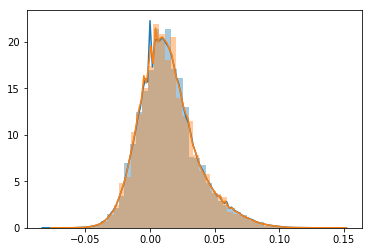

In [25]:
# Get difference in accuracies via bootstrap



bs_collapse = (bs_crt_mod_res
               .query('~combat')
               .loc[:, ['bal_proc', 'pn', 'fn', 'task', 'contrast', 'label', 'ho_score']]
               .merge(bs_crt_mod_res
                      .query('combat')
                      .loc[:, ['bal_proc', 'pn', 'fn', 'task', 'contrast', 'label', 'ho_score']],
                      on=['bal_proc', 'pn', 'fn', 'task', 'contrast', 'label'],
                      how='left',
                      suffixes=('_uncorrected', '_combat')))
bs_collapse['difference'] = bs_collapse.ho_score_uncorrected - bs_collapse.ho_score_combat

sns.distplot(bs_collapse.query('bal_proc == "sex"').difference.values)
sns.distplot(bs_collapse.query('bal_proc == "age_rsd"').difference.values)
sns.distplot(bs_collapse.query('bal_proc == "age_bal"').difference.values)

In [26]:
ps = (bs_collapse
      .groupby(['bal_proc', 'task', 'contrast', 'label'])
      .apply(lambda x: pd.Series(rp.get_bs_p(x.difference.values, 0)))
      .rename(columns={0:'bs_p'})
      .reset_index())

In [27]:
crt_mod_to_plot = crt_mod_to_plot.merge(ps.loc[:,['bs_p', 'bal_proc', 'contrast']], how='left', on=['contrast', 'bal_proc'])


In [28]:
plot_range = (uncorlist[0].groupby('col').y.max() - uncorlist[0].groupby('col').y.min()).max()


<BarContainer object of 4 artists>

 <BarContainer object of 4 artists>]

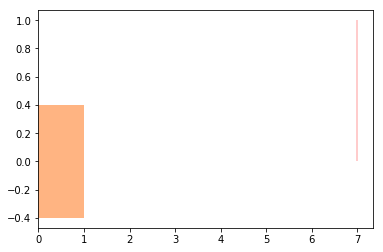

In [29]:
fig,ax = plt.subplots(1)
sig_palette=sns.color_palette('muted')[0:len(mod_names)]
palette=sns.color_palette('pastel')[0:len(mod_names)]
bottom = np.zeros(len(mod_names)*2)
width = np.ones(len(mod_names)*2)
leg_labels = []
colors = []
for i,vf in enumerate(mod_names):
    colors.append(sig_palette[i])
    leg_labels.append('Sig. '+vf)
    leg_labels.append(vf)
    colors.append(palette[i])
ax.barh(bottom, width, color=colors, label=['Sig. Sex, Hand Bal.', 'Sex, Hand Bal.','Sig. Sex, Hand Bal., Age Regressed', 'Sex, Hand Bal., Age Regressed' ])
ax.vlines(sig_thresh['normal'], 0,2-1, colors = 'r', lw=0.4, label='Multiple Comparison\nCorrected p<0.01')
leg_hand, leg_labels = ax.get_legend_handles_labels()
leg_hand
handles = []
handles.extend(leg_hand[1])
handles.append(leg_hand[0])

labels = ['Sig. Sex, Hand Bal.', 'Sex, Hand Bal.','Sig. Sex, Hand Bal., Age Regressed', 'Sex, Hand Bal., Age Regressed' ]
labels.append(leg_labels[0])

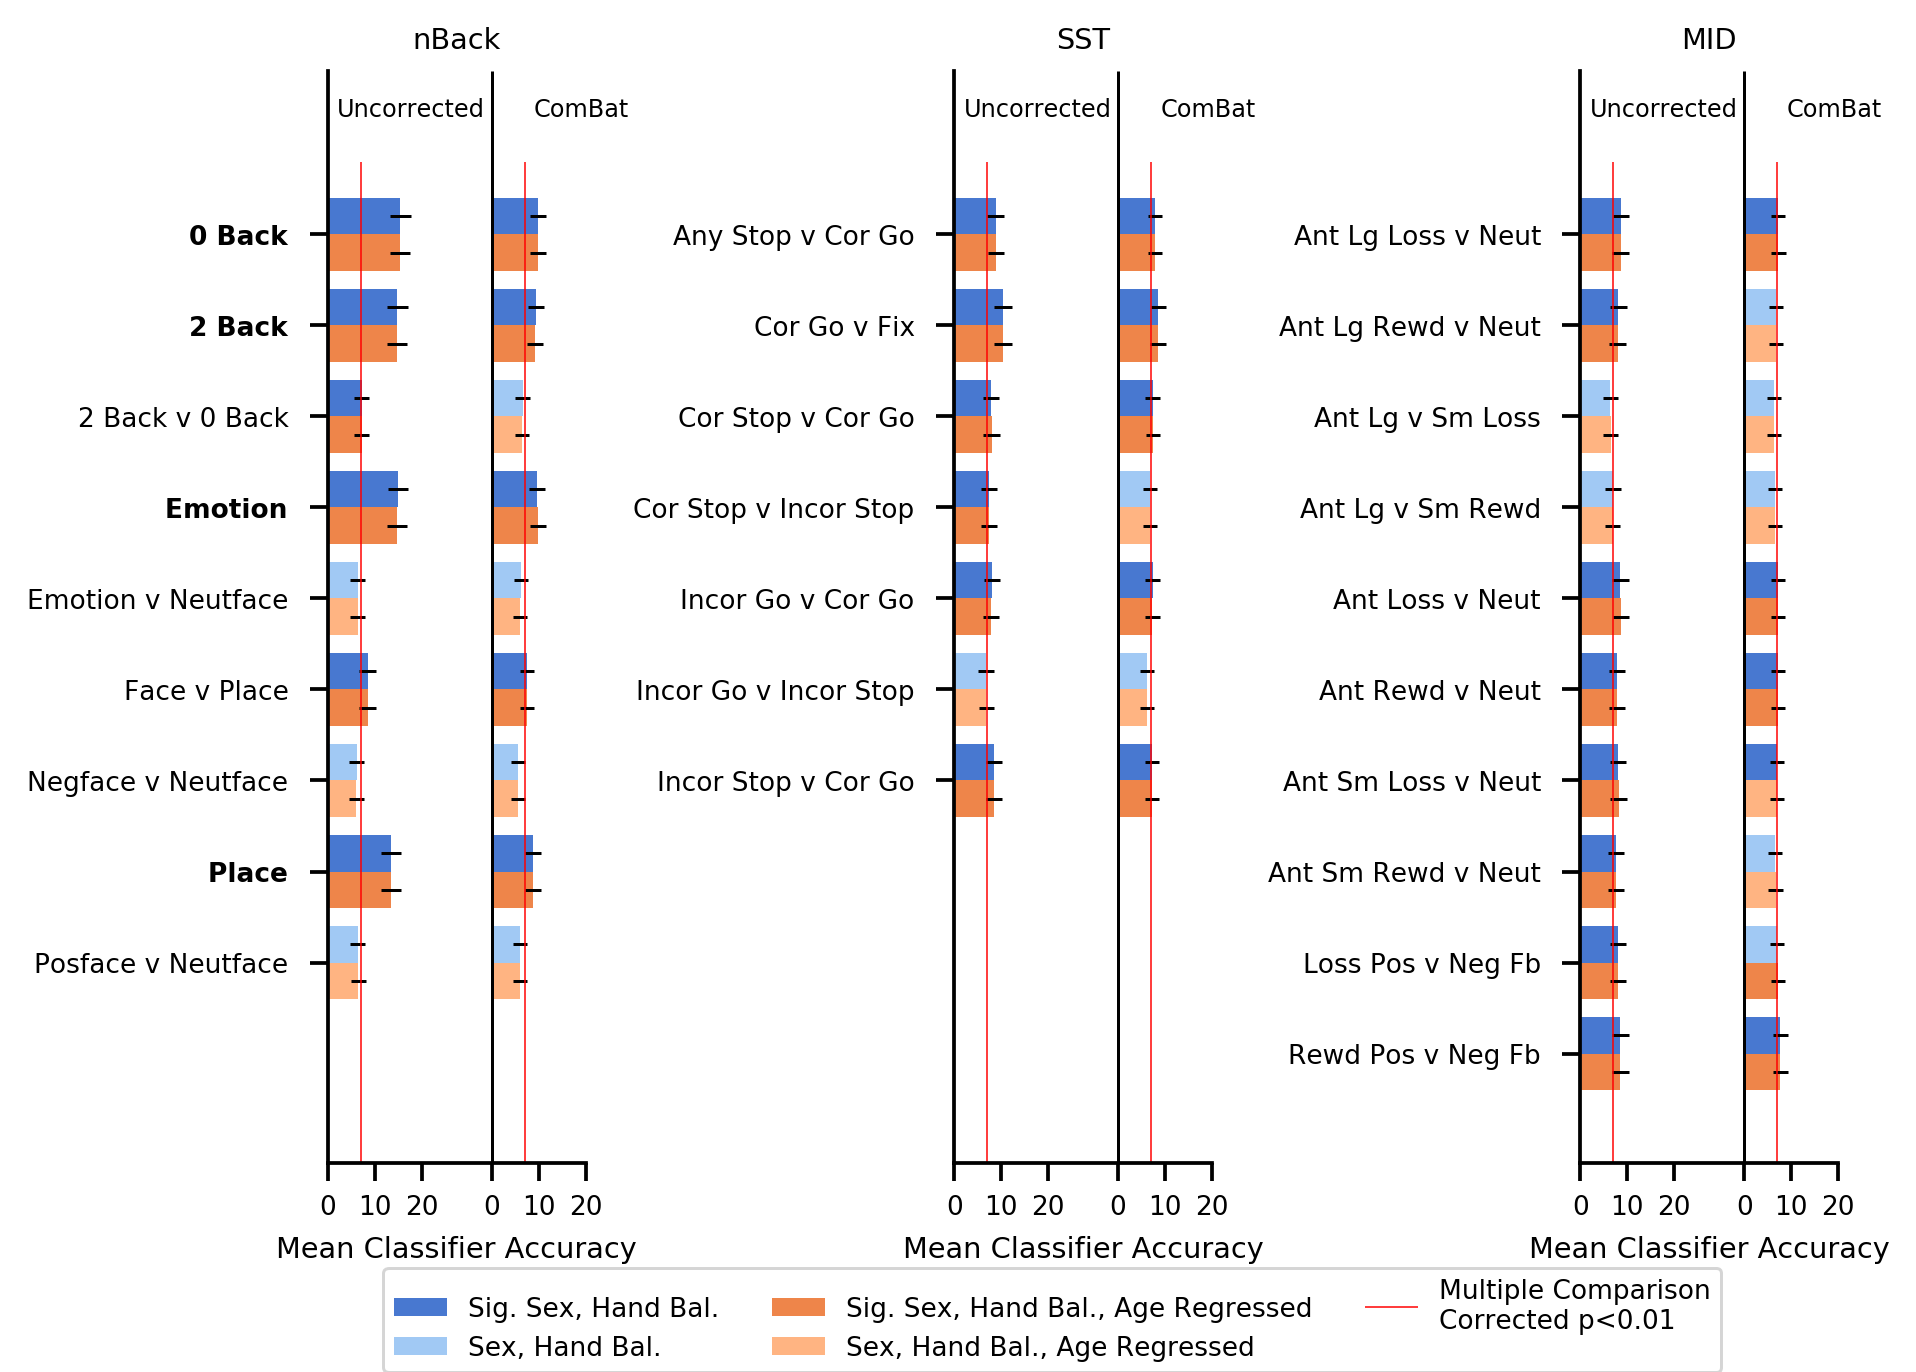

In [30]:
sns.set_context('paper', font_scale=0.8)
fig, axes = plt.subplots(1, 3, figsize=(7,5), dpi=270)

for col in np.arange(len(axes)):
    ax = axes[col]
    for uc, cb in zip(uncorlist, cblist):
        uc = uc.copy()
        cb = cb.copy()
        uc.y = 0 - uc.y
        cb.y = 0 - cb.y
        barh_dict = uc.loc[uc.col == col, ['y', 'color', 'left', 'tick_label', 'width', 'height', 'xerr']].to_dict('list')
        cb_barh_dict = cb.loc[cb.col == col, ['y', 'color', 'left', 'tick_label', 'width', 'height', 'xerr']].to_dict('list')
        
        names = uc.loc[uc.col == col, ['task']]
        _plot = ax.barh(**barh_dict, error_kw={'elinewidth':0.8})
        _plot = ax.barh(**cb_barh_dict, error_kw={'elinewidth':0.8})
    name_df = uc.loc[uc.col == col, ['y', 'task']].groupby('task').max().reset_index()
    #for ii, row in name_df.iterrows():
    #    _text = ax.text(11, row.bottom + 1, row.metric, va='bottom', ha='center')
    yb,yt = ax.get_ylim()
    _ylims = ax.set_ylim((np.max(barh_dict['y'])-plot_range-1, np.max(barh_dict['y'])+2))
    yb,yt = ax.get_ylim()
    _vl = ax.vlines(secondaxis_start, yb,yt, lw=0.8)
    _vl = ax.vlines(sig_thresh['normal'], yb,yt-1, colors = 'r', lw=0.4)
    _vl = ax.vlines(secondaxis_start+cb_sig_thresh['combat'], yb,yt-1, colors = 'r', lw=0.4)

    _lim = ax.set_ylim((yb,yt))
    t = ax.set_xticks([0,10,20,secondaxis_start, secondaxis_start+10, secondaxis_start+20])
    _tl = ax.set_xticklabels([0,10,20,0, 10, 20])
    _ylims = ax.set_ylim((yb, yt))
    _t = ax.text(2, yt-0.5, 'Uncorrected', fontsize='small')
    _t = ax.text(44, yt-0.5, 'ComBat', fontsize='small')
    _t = ax.set_title(name_df.task.values[0])
    _t = ax.set_xlabel('Mean Classifier Accuracy')
    _yt = ax.set_yticks(uc.loc[uc.col == col, 'y'] + uc.loc[uc.col == col, 'height'] / 2)
    
# Make Condition labels bold
new_labels = []
for tl in axes[0].get_yticklabels():
    txt = tl.get_text()
    if '*' in txt:
        _tl = tl.set_weight('bold')
        txt = txt.replace('*', '')
    new_labels.append(txt)
_tl = axes[0].set_yticklabels(new_labels)
#for tl in axes[0].get_yticklabels():
#    print(tl.get_text())
fig.tight_layout()
_leg = fig.legend(handles, labels, loc=(0.2,0), ncol=3 )    
fig.subplots_adjust(bottom = 0.135)

# Add *'s to sig reductions
for uc in uncorlist:
    if 'normal' in uc.label.values:
        sig_reduced = crt_mod_to_plot.query('name=="normal"').loc[:, ['label', 'bs_p']]
    elif 'age_rsd' in uc.label.values:
        sig_reduced = crt_mod_to_plot.query('name=="age_rsd"').loc[:, ['label', 'bs_p']]
    tmp = uc.merge(sig_reduced, how='left', left_on='tick_label', right_on='label')
    tmp = tmp.query('bs_p< 0.02')
    for col, df in tmp.groupby('col'):
        ax = axes[col]
        for yval in (df.y):
            _s = ax.text(secondaxis_start+20, 0-yval-0.1, '*', va='center', ha='center', fontweight='bold', fontsize='small')
        

sns.despine(fig)

In [31]:
bs_crt_mod_res['is_contrast'] = False
# Pick out the contrasts
bs_crt_mod_res.loc[bs_crt_mod_res.contrast.str.contains('vs'), 'is_contrast'] = True

In [32]:
bs_crt_mod_res.head()

,pn,fn,name,ho_score,cfn,coef,task,contrast,label,bal_proc,combat,is_contrast
0,0,0,normal,0.096257,"[[0, 1, 1, 2, 0, 1, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 1, 0, 3, 2, 0, 0, 2, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 3, 1], [0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0], [0, 0, 1, 0, 3, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0], [0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 3, 1, 0], [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2], [0, 0, 0, 0, 0, 1, 0, 1, 4, 0, 2, 0, 0, 1, 0, 2, 0], [0, 1, 1, 0, 2, 0,...","[[0.0623332517425371, -0.1439732091310297, 0.07261089194702773, -0.8729722871630685, -0.06857213208194612, -0.12957634621982028, 0.33659387429255694, 0.24514823222266574, 0.399335338533598, 0.47187385709434954, -0.2179066786396707, -0.028902568823625727, -0.0897655992553465, -0.06917178725042512, 0.5091821434217756, 0.3954721599245943, 0.4459402733206167, -0.3106895602048214, 0.39784309867050016, -0.19730003013911485, -0.6108216229742245, 0.19573628773060808, -0.7730939683265949, 0.281740301...",mid,antic.large.loss.vs.neutral.pkz,antic.large.loss.vs.neutral.pkz,sex,False,True
1,0,0,age_rsd,0.112299,"[[0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0], [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 3, 1], [0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0], [0, 0, 1, 0, 3, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0], [0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 0, 0, 1, 0, 3, 1, 1], [0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2], [0, 0, 0, 0, 0, 1, 0, 1, 4, 0, 2, 0, 0, 1, 0, 2, 0], [0, 1, 1, 0, 2, 0,...","[[0.06944692377949116, -0.11206770204748917, 0.08022945450586264, -0.8886458994247901, -0.06358355440504652, -0.12843290121314882, 0.3326110043394445, 0.2356263473033742, 0.38776828546432063, 0.48117095583131436, -0.20614177363290936, -0.01696991388091146, -0.09009533036256938, -0.061630230122386685, 0.5113527435035411, 0.38993170962239576, 0.4427885998069136, -0.29388422644721507, 0.4057067015130933, -0.2035450032612392, -0.615650345326564, 0.19978065730594913, -0.7742662498668945, 0.290456...",mid,antic.large.loss.vs.neutral.pkz,antic.large.loss.vs.neutral.pkz,age_rsd,False,True
2,0,0,cbagersd,0.085561,"[[1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1], [2, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0], [0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2], [0, 0, 0, 1, 3, 0, 1, 0, 0, 1, 0, 3, 1, 0, 1, 0, 0], [0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2], [0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 3, 1, 0, 1, 1, 1], [0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 1, 1, 0, 1, 0, 1, 2], [0, 2, 0, 0, 2, 0,...","[[-0.002481060138894127, -0.1299750279047206, 0.047178809515181386, -0.5575693291694399, -0.04662868630674647, -0.1565701828444183, 0.08805315071305671, 0.12013119371747122, 0.4421349184519099, 0.44527963841678986, -0.06332637330747341, 0.2949106761981261, 0.2448362952175382, 0.05758547401670128, 0.21200773479343415, 0.314778894448132, 0.5001693561952799, -0.19220163879447869, 0.03203378784589228, -0.2196607309683681, -0.15555269910993116, 0.07749635094134427, -0.7282939542596469, 0.21983343...",mid,antic.large.loss.vs.neutral.pkz,antic.large.loss.vs.neutral.pkz,age_rsd,True,True
3,0,0,combat,0.080214,"[[0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1], [2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0], [0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1], [0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 3, 1, 0, 1, 0, 1], [0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1], [1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1], [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 3], [0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 1, 1, 0, 1, 0, 1, 2], [0, 2, 0, 0, 2, 0,...","[[-0.010250360629888149, -0.14842581088036874, 0.04533085069

In [33]:
mean_conds_cors = bs_crt_mod_res.query('~combat').groupby(['name', 'is_contrast', 'pn'])[['ho_score']].mean().reset_index()

In [34]:
alpha

0.02

In [35]:
mean_conds_cors = (mean_conds_cors.query('is_contrast')
.loc[:,['name', 'pn', 'ho_score']]
.merge(mean_conds_cors.query('~is_contrast')
       .loc[:,['name', 'pn', 'ho_score']],
      how='left',
      on=['name', 'pn'],
      suffixes=['_contrast', '_condition']))

In [36]:
mean_conds_cors['ho_score_dif'] = mean_conds_cors.ho_score_condition - mean_conds_cors.ho_score_contrast

In [37]:
mean_conds_cors.groupby('name').ho_score_dif.apply(lambda x:rp.get_bs_stats(alpha, x)).reset_index()

Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.


,name,level_1,ho_score_dif
0,age_rsd,mean_val,0.058026
1,age_rsd,q_0.0100,0.029412
2,age_rsd,q_0.9900,0.087166
3,age_rsd,sign,1.000000
4,age_rsd,std_val,0.012351
5,age_rsd,uncorrected_p,0.000200
6,normal,mean_val,0.058389
7,normal,q_0.0100,0.030131
8,normal,q_0.9900,0.087735
9,normal,sign,1.000000


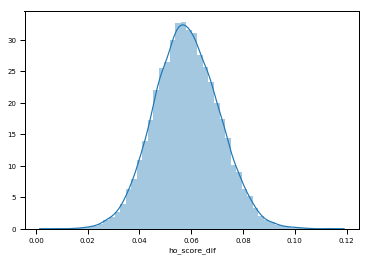

In [38]:
sns.distplot(mean_conds_cors.ho_score_dif)

# plot distribution of variance explained

In [39]:
tfmri_var_res_keep = rp.get_complete_perms(crt_var_res,tfmri=True)
tfmri_cb_var_res_keep = rp.get_complete_perms(crt_cb_var_res, tfmri=True)

tfmri_var_res_keep['is_contrast'] = False
# Pick out the contrasts
tfmri_var_res_keep.loc[tfmri_var_res_keep.contrast.str.contains('vs'), 'is_contrast'] = True
tfmri_cb_var_res_keep['is_contrast'] = False
tfmri_cb_var_res_keep.loc[tfmri_cb_var_res_keep.contrast.str.contains('vs'), 'is_contrast'] = True

In [40]:
alpha = 0.01

tfmricn_sig_df = pd.DataFrame(tfmri_var_res_keep.query('is_contrast').groupby('pn')[['mfg_varex','model_varex','site_varex']].max().quantile([1-alpha]).iloc[0, :]).T.reset_index(drop=True)
tfmricn_sig_df['modality'] = "tfmri_contrast"

tfmricn_cb_sig_df = pd.DataFrame(tfmri_cb_var_res_keep.query('is_contrast').groupby('pn')[['mfg_varex','model_varex','site_varex']].max().quantile([1-alpha]).iloc[0, :]).T.reset_index(drop=True)
tfmricn_cb_sig_df['modality'] = "tfmri_contrast"

tfmricd_sig_df = pd.DataFrame(tfmri_var_res_keep.query('~is_contrast').groupby('pn')[['mfg_varex','model_varex','site_varex']].max().quantile([1-alpha]).iloc[0, :]).T.reset_index(drop=True)
tfmricd_sig_df['modality'] = "tfmri_condition"

tfmricd_cb_sig_df = pd.DataFrame(tfmri_cb_var_res_keep.query('~is_contrast').groupby('pn')[['mfg_varex','model_varex','site_varex']].max().quantile([1-alpha]).iloc[0, :]).T.reset_index(drop=True)
tfmricd_cb_sig_df['modality'] = "tfmri_condition"

tfmri_sig_df = pd.concat([tfmricn_sig_df, tfmricd_sig_df])
tfmri_cb_sig_df = pd.concat([tfmricn_cb_sig_df, tfmricd_cb_sig_df])
tfmri_sig_df[' '] = 'Uncorrected'
tfmri_cb_sig_df[' '] = 'ComBat'
tfmri_sig_df_melt = pd.concat([tfmri_sig_df, tfmri_cb_sig_df])
tfmri_sig_df_melt = tfmri_sig_df_melt.rename(columns={'agh_varex':'Age & Sex', 'mfg_varex':'Manufacturer', 'model_varex':'Model', 'site_varex': 'Site'})
tfmri_sig_df_melt = tfmri_sig_df_melt.melt(id_vars=['modality', ' ',],
                                      value_name='sig_thresh')

In [41]:
tfmri_to_plot = tfmri_var_res_keep.query('pn == 0')

tfmri_to_plot_cb = tfmri_cb_var_res_keep.query('pn == 0')

tfmri_to_plot[' '] = 'Uncorrected'
tfmri_to_plot_cb[' '] = 'ComBat'

tfmri_to_plot = pd.concat([tfmri_to_plot, tfmri_to_plot_cb])

tfmri_to_plot.metric = tfmri_to_plot.task + '__' + tfmri_to_plot.contrast + '__' + tfmri_to_plot.metric
tfmri_to_plot = tfmri_to_plot.rename(columns={'agh_varex':'Age & Sex', 'mfg_varex':'Manufacturer', 'model_varex':'Model', 'site_varex': 'Site'})
tfmri_to_plot['modality'] = 'tfmri'
tfmri_to_plot.loc[tfmri_to_plot.is_contrast, 'modality'] = 'tfmri_contrast'
tfmri_to_plot.loc[~tfmri_to_plot.is_contrast, 'modality'] = 'tfmri_condition'
tfmri_to_table = tfmri_to_plot.copy()
tfmri_to_table.drop(['int_r2', 'agh_r2', 'aghs_r2', 'aghss_r2', 'aghsss_r2', 'agh_rescode', 'aghs_rescode', 'aghss_rescode', 'aghsss_rescode', 'int_rescode', 'variance',], axis=1, inplace=True)

tfmri_to_plot.drop(['int_r2', 'agh_r2', 'aghs_r2', 'aghss_r2', 'aghsss_r2', 'task', 'contrast','agh_rescode', 'aghs_rescode', 'aghss_rescode', 'aghsss_rescode', 'int_rescode', 'variance'], axis=1, inplace=True)


/data/nielsond/python/envs/abcd_mine/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/data/nielsond/python/envs/abcd_mine/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
to_plot_melt = tfmri_to_plot.melt(id_vars=['pn', 'metric', 'modality', 'label', ' ', 'atlas', 'is_contrast'],
                            value_name='% Variance Explained')

[Text(0,0,'Manufacturer'),
 Text(0,0,'Model'),
 Text(0,0,'Site'),
 Text(0,0,'Age & Sex')]

Text(0.5,1,'TFMRI_CONTRAST')

[Text(0,0,'Manufacturer'),
 Text(0,0,'Model'),
 Text(0,0,'Site'),
 Text(0,0,'Age & Sex')]

Text(0.5,1,'TFMRI_CONDITION')

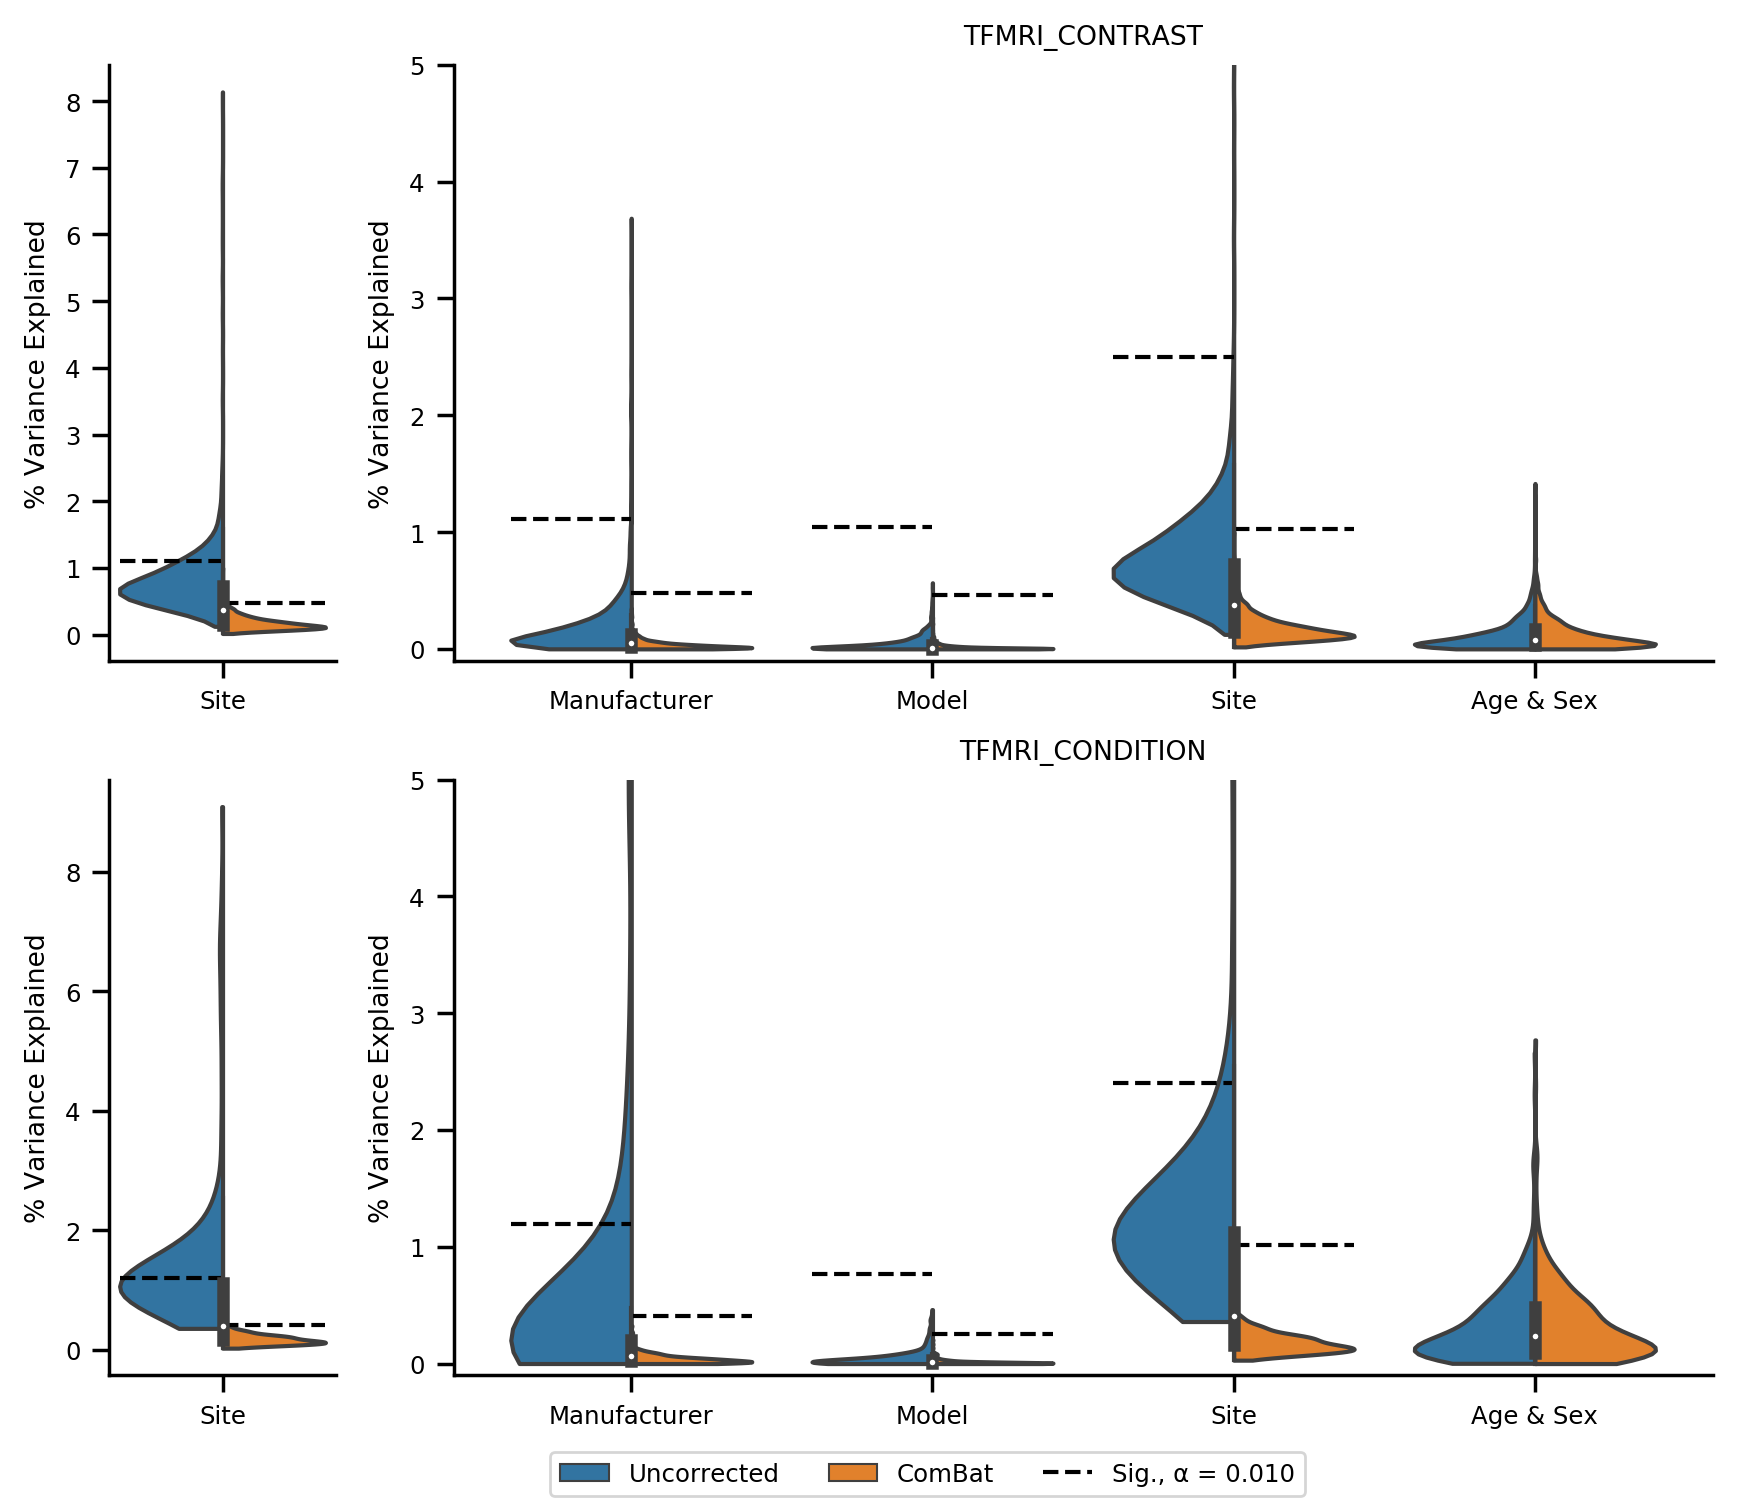

In [43]:
#fig, axs = plt.subplots(2, 2, figsize=(7,5), dpi=250, sharey=False)
shape=(2,5)
axs = [[plt.subplot2grid(shape, (0, 0), colspan=1),
           plt.subplot2grid(shape, (0, 1), colspan=4)],
      [plt.subplot2grid(shape, (1, 0), colspan=1),
           plt.subplot2grid(shape, (1, 1), colspan=4)]]
fig = plt.gcf()
fig.set_dpi(250)
fig.set_size_inches((7,6))

for modality, axrow in zip(['tfmri_contrast', 'tfmri_condition'], axs):
    ax = axrow[0]
    
    ax = sns.violinplot(x='variable', y='% Variance Explained', 
                   hue=' ', data=to_plot_melt.query('variable=="Site" & modality == @modality'),
                   split=True, scale='width', cut=0, ax=ax, inner='box')
    
    _ = ax.hlines(tfmri_sig_df.loc[tfmri_sig_df.modality == modality, ['mfg_varex']].values, 
              xmin = -0.4, 
              xmax = 0.0,
              linestyle ='dashed',
               label=f'Sig., α = {alpha:0.3f}')
    _ = ax.hlines(tfmri_cb_sig_df.loc[tfmri_cb_sig_df.modality == modality, ['mfg_varex']].values, 
              xmin = 0.0, 
              xmax = 0.4,
              linestyle ='dashed')
    ax.get_legend().remove()
    _ = ax.set_xlabel('')
    
    ax = axrow[1]
    
    ax = sns.violinplot(x='variable', y='% Variance Explained',
                   hue=' ', 
                   data=to_plot_melt.query('modality == @modality'),
                   order= ['Manufacturer', 'Model', 'Site','Age & Sex'],
                   split=True, scale='width', cut=0, ax=ax)
    # draw sig lines
    _ = ax.hlines(tfmri_sig_df.loc[tfmri_sig_df.modality == modality,['mfg_varex', 'model_varex', 'site_varex']].values, 
              xmin = np.arange(0,4)-0.4, 
              xmax = np.arange(0,4),
              linestyles='dashed')
    _ = ax.hlines(tfmri_cb_sig_df.loc[tfmri_cb_sig_df.modality == modality,['mfg_varex', 'model_varex',  'site_varex']].values, 
          xmin = np.arange(0,4), 
          xmax = np.arange(1,5)-0.6,
          linestyle ='dashed')
    if modality == 'tfmri':
        _ = ax.set_ylim(-0.1, 5)
    else:    
        _ = ax.set_ylim((-0.1, 5))
    ax.get_legend().remove()
    _ = ax.set_xlabel('')
    
    labels = ax.get_xticklabels()
    labels[2]='Site'
    labels[3]='Age & Sex'
    ax.set_xticklabels(labels)
    
    ax.set_title(modality.upper())
    
fig.tight_layout()
sns.despine()

leg =  axs[0][0].get_legend_handles_labels()
fl = fig.legend(*leg, loc='lower center', bbox_to_anchor=(0.53,0.0), ncol=3)
fig.subplots_adjust(bottom = 0.08)
#fig.savefig('abcd_fig1.png', bbox_inches="tight")

# Get table of significant variance explained

In [44]:
tfmri_sig_df_melt

,modality,,variable,sig_thresh
0,tfmri_contrast,Uncorrected,Manufacturer,1.108695
1,tfmri_condition,Uncorrected,Manufacturer,1.197283
2,tfmri_contrast,ComBat,Manufacturer,0.481263
3,tfmri_condition,ComBat,Manufacturer,0.410906
4,tfmri_contrast,Uncorrected,Model,1.041015
5,tfmri_condition,Uncorrected,Model,0.769522
6,tfmri_contrast,ComBat,Model,0.457523
7,tfmri_condition,ComBat,Model,0.250027
8,tfmri_contrast,Uncorrected,Site,2.502573
9,tfmri_condition,Uncorrected,Site,2.398905


In [45]:
tfmri_to_table.melt(id_vars=['pn', 'metric', 'modality', 'label', ' ', 'atlas', 'is_contrast', 'task', 'contrast'],
                            value_name='% Variance Explained')

,pn,metric,modality,label,,atlas,is_contrast,task,contrast,variable,% Variance Explained
0,0,mid__antic.large.loss.vs.neutral.pkz__cort.desikan__bankssts.lh,tfmri_contrast,antic.large.loss.vs.neutral.pkz,Uncorrected,cort.desikan,True,mid,antic.large.loss.vs.neutral.pkz,Age & Sex,0.132017
1,0,mid__antic.large.loss.vs.neutral.pkz__cort.desikan__caudalanteriorcingulate.lh,tfmri_contrast,antic.large.loss.vs.neutral.pkz,Uncorrected,cort.desikan,True,mid,antic.large.loss.vs.neutral.pkz,Age & Sex,0.031178
2,0,mid__antic.large.loss.vs.neutral.pkz__cort.desikan__caudalmiddlefrontal.lh,tfmri_contrast,antic.large.loss.vs.neutral.pkz,Uncorrected,cort.desikan,True,mid,antic.large.loss.vs.neutral.pkz,Age & Sex,0.036185
3,0,mid__antic.large.loss.vs.neutral.pkz__cort.desikan__cuneus.lh,tfmri_contrast,antic.large.loss.vs.neutral.pkz,Uncorrected,cort.desikan,True,mid,antic.large.loss.vs.neutral.pkz,Age & Sex,0.002894
4,0,mid__antic.large.loss.vs.neutral.pkz__cort.desikan__entorhinal.lh,tfmri_contrast,antic.large.loss.vs.neutral.pkz,Uncorrected,cort.desikan,True,mid,antic.large.loss.vs.neutral.pkz,Age & Sex,0.326368
5,0,mid__antic.large.loss.vs.neutral.pkz__cort.desikan__fusiform.lh,tfmri_contrast,antic.large.loss.vs.neutral.pkz,Uncorrected,cort.desikan,True,mid,antic.large.loss.vs.neutral.pkz,Age & Sex,0.053435
6,0,mid__antic.large.loss.vs.neutral.pkz__cort.desikan__inferiorparietal.lh,tfmri_contrast,antic.large.loss.vs.neutral.pkz,Uncorrected,cort.desikan,True,mid,antic.large.loss.vs.neutral.pkz,Age & Sex,0.004541
7,0,mid__antic.large.loss.vs.neutral.pkz__cort.desikan__inferiortemporal.lh,tfmri_contrast,antic.large.loss.vs.neutral.pkz,Uncorrected,cort.desikan,True,mid,antic.large.loss.vs.neutral.pkz,Age & Sex,0.032171
8,0,mid__antic.large.loss.vs.neutral.pkz__cort.desikan__isthmuscingulate.lh,tfmri_contrast,antic.large.loss.vs.neutral.pkz,Uncorrected,cort.desikan,True,mid,antic.large.loss.vs.neutral.pkz,Age & Sex,0.095702
9,0,mid__antic.large.loss.vs.neutral.pkz__cort.desikan__lateraloccipital.lh,tfmri_contrast,antic.large.loss.vs.neutral.pkz,Uncorrected,cort.desikan,True,mid,antic.large.loss.vs.neutral.pkz,Age & Sex,0.082928


In [46]:
sig_table = tfmri_to_table.melt(id_vars=['pn', 'metric', 'modality', 'label', ' ', 'atlas', 'is_contrast', 'task', 'contrast'],
                            value_name='% Variance Explained')

In [47]:
sig_table = sig_table.merge(tfmri_sig_df_melt, how='left', on=['variable', 'modality', ' '])

In [48]:
sig_table['sig'] = sig_table['% Variance Explained'] > sig_table.sig_thresh

In [49]:
sig_table['task'] = sig_table.task.str.upper()
sig_table['label'] = ''

sig_table.loc[~sig_table.contrast.str.contains('vs'), 'label'] = (sig_table
                                                                              .contrast
                                                                              .str.split('.')
                                                                              .str.join(' ')
                                                                              .str.title()) + '* '
sig_table.loc[sig_table.contrast.str.contains('vs'), 'label'] =(sig_table
                                                                             .contrast
                                                                             .str.replace('fixation', 'Fix')
                                                                             .str.replace('reward', 'Rewd')
                                                                             .str.replace('small', 'Sm')
                                                                             .str.replace('large', 'Lg')
                                                                             .str.replace('neutral', 'Neut')
                                                                             .str.replace('positive', 'Pos')
                                                                             .str.replace('negative', 'Neg')
                                                                             .str.replace('antic', 'Ant')
                                                                             .str.replace('-any', '')
                                                                             .str.replace('correct', 'cor')
                                                                             .str.replace('-of', '')
                                                                             .str.replace('feedback', 'FB')
                                                                             .str.split('.')
                                                                             .str.join(' ')
                                                                             .str.title()
                                                                             .str.replace('Vs', 'v')) + ' '
sig_table['task'] = sig_table.task.str.replace('NBACK', 'nBack')
sig_table['label'] = sig_table.label.str.replace(' Pkz', '')
sig_table['metric'] = sig_table.metric.str.split('__').str[-1]

## Table of significant % variance explained

In [50]:
(sig_table.query('sig')
    .sort_values(['task','is_contrast', 'label', ' ', 'atlas','metric', 'variable', '% Variance Explained'],
                ascending=[False, True, False, False, False, False, False, True])
    .loc[:,['task', 'label','metric', 'variable',' ', '% Variance Explained']]
    .rename(columns={'task': 'Task','label': 'Contrast', 'metric':'ROI', ' ':'Corrected'})).reset_index()

,index,Task,Contrast,ROI,variable,Corrected,% Variance Explained
0,6830,nBack,Place*,cerebral.white.matter.lh,Manufacturer,Uncorrected,1.407270
1,6834,nBack,Place*,cerebellum.cortex.lh,Manufacturer,Uncorrected,1.312092
2,6789,nBack,Place*,superiorparietal.lh,Manufacturer,Uncorrected,2.221841
3,17007,nBack,Place*,pericalcarine.rh,Site,Uncorrected,7.973099
4,6815,nBack,Place*,pericalcarine.rh,Manufacturer,Uncorrected,6.239553
5,16973,nBack,Place*,pericalcarine.lh,Site,Uncorrected,6.769723
6,6781,nBack,Place*,pericalcarine.lh,Manufacturer,Uncorrected,7.748202
7,17005,nBack,Place*,parsorbitalis.rh,Site,Uncorrected,2.744843
8,6813,nBack,Place*,parsorbitalis.rh,Manufacturer,Uncorrected,1.891280
9,6779,nBack,Place*,parsorbitalis.lh,Manufacturer,Uncorrected,1.316297


# Get table of significant changes in variance

In [51]:
bs_crt_var_res = rp.get_varex(bs_crt_var_res)
#cb_var_res['int_r2'] = 0 
bs_crt_cb_var_res = rp.get_varex(bs_crt_cb_var_res)
bs_crt_var_res.metric = bs_crt_var_res.task + '__' + bs_crt_var_res.contrast + '__' + bs_crt_var_res.metric
bs_crt_cb_var_res.metric = bs_crt_cb_var_res.task + '__' + bs_crt_cb_var_res.contrast + '__' + bs_crt_cb_var_res.metric


In [52]:
alpha = 0.005


In [53]:

bs_var_res, bs_dif_sig = rp.get_sig_var_difs(alpha, bs_crt_var_res, bs_crt_cb_var_res, verbose=True)

Beginning processing metric 0 of 2548
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Completed 100 metrics.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Completed 150 metrics.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Completed 200 metrics.
Could not fit GPD to tail of distribution, returning empi

Could not fit GPD to tail of distribution, returning empirical cdf based p.
Completed 1600 metrics.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Completed 1650 metrics.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Completed 1700 metrics.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Could not fit GPD to tail of distribution, returning empirical cdf based p.
Completed 1750 m

In [54]:
cor_p = multipletests(bs_dif_sig.uncorrected_p.values,method='sidak', alpha=alpha)
bs_dif_sig['p'] = cor_p[1]
bs_dif_sig['sig'] = cor_p[0]

In [55]:
(bs_dif_sig.query('p < @alpha')
 .sort_values(['level', 'metric'])
 .loc[:, ['level', 'metric', 'mean_dif', 'uncorrected_p', 'p']]).reset_index(drop=True)

,level,metric,mean_dif,uncorrected_p,p
0,mfg_varex,nback__2.back.pkz__cort.desikan__lingual.rh,6.330262,3.866476e-13,4.926439e-09
1,mfg_varex,nback__2.back.pkz__subcort.aseg__hippocampus.lh,0.776586,9.583808e-10,1.220970e-05
2,pct_variance,mid__antic.large.loss.vs.neutral.pkz__cort.desikan__cuneus.lh,8.954876,1.134420e-08,1.445146e-04
3,pct_variance,mid__antic.large.loss.vs.neutral.pkz__cort.desikan__paracentral.rh,3.179358,4.103134e-08,5.226026e-04
4,pct_variance,mid__antic.large.loss.vs.neutral.pkz__subcort.aseg__cerebellum.cortex.rh,3.476483,7.627409e-11,9.717315e-07
5,pct_variance,mid__antic.large.reward.vs.neutral.pkz__cort.desikan__rostralanteriorcingulate.rh,3.340037,3.158707e-12,4.024178e-08
6,pct_variance,mid__antic.large.vs.small.loss.pkz__cort.desikan__superiorparietal.lh,3.755071,3.946878e-08,5.027058e-04
7,pct_variance,mid__antic.large.vs.small.reward.pkz__cort.desikan__precuneus.lh,2.577280,1.262902e-07,1.607644e-03
8,pct_variance,mid__antic.large.vs.small.reward.pkz__cort.desikan__supramarginal.rh,2.830506,2.355863e-07,2.996870e-03
9,pct_variance,mid__antic.large.vs.small.reward.pkz__subcort.aseg__caudate.rh,2.552446,1.175138e-07,1.496006e-03


In [56]:
# Sign here is negative if combat increased variance/variance explained
bs_dif_sig.groupby(['level','sig','sign']).agg({'metric':'count', 'mean_dif':'mean'})

metric  mean_dif
level        sig   sign                  
agh_varex    False -1.0    1258 -0.018261
                    1.0    1290  0.018699
mfg_varex    False  1.0    2546  0.344598
             True   1.0       2  3.553424
model_varex  False -1.0       8 -0.004766
                    1.0    2540  0.083866
pct_variance False  1.0    2488  3.675199
             True   1.0      60  4.986721
site_varex   False  1.0    2483  1.405318
             True   1.0      65  1.353039

# Analyses below this point are exploratory and are not preregisterred

# Plot significant changes in variance on brain

In [ ]:
vsig_conds = sig_table.query('sig').loc[sig_table[' ']=="Uncorrected", :].contrast.unique()
sig_coef = np.array(list(crt_mod_res.loc[crt_mod_res.contrast.isin(vsig_conds) & (crt_mod_res.name == "normal") & (crt_mod_res.pn == 0), 'coef'].values)).mean(0)
coef_perms = crt_mod_res.loc[crt_mod_res.contrast.isin(vsig_conds) & (crt_mod_res.name == "normal"), ['pn', 'coef']].groupby('pn')
#coef_ts = []
coef_mean = []
for pn, df in coef_perms:
    #coef_ts.append(stats.ttest_1samp(np.array(list(df.coef.values)), 0)[0])
    coef_mean.append(df.coef.values.mean(0))
    print(pn, end=',')
coef_mean = np.array(coef_mean)

In [ ]:
nxcede = np.zeros((*sig_coef.flatten().shape,2))
upper_null = coef_mean.max(1).max(1)
lower_null = coef_mean.min(1).min(1)
for ii, x in enumerate(sig_coef.flatten()):
    nxcede[ii,0] = (x > upper_null).mean()
    nxcede[ii, 1] = (x < lower_null).mean()
nxcede = (1 - nxcede.max(-1).reshape(sig_coef.shape)) * 2
nxcede[nxcede > 1] = 1

In [ ]:
bs_coefs = bs_crt_mod_res.loc[(bs_crt_mod_res.contrast == '2.back.pkz')
                              & (bs_crt_mod_res.name == "normal") 
                              & (bs_crt_mod_res.task == "nback"), ['pn', 'contrast', 'coef']]

In [ ]:
bs_coefs = (np.array(list(bs_coefs.coef.values)))

In [ ]:
bs_coefs_res = rp.get_bs_res(bs_coefs, 0.05)

In [ ]:
rp._run_gpd_p(np.random.standard_normal(1000) - , side="lower")

In [ ]:
np.random.seed(seed=1)
assert rp._run_gpd_p(np.random.standard_normal(1000) + 3, side="lower") < 0.05
assert rp._run_gpd_p(np.random.standard_normal(1000) + 3, side="upper") > 0.95
assert rp._run_gpd_p(np.random.standard_normal(1000) - 3, side="lower") > 0.95
assert rp._run_gpd_p(np.random.standard_normal(1000) - 3, side="upper") < 0.05


In [ ]:
coef_mean.max(1).max(1)
coef_mean.min(1).min(1)

In [ ]:
crt_var_res.append(pd.DataFrame(pkr[1]).assign(**{'task': task, 'contrast':contrast, 'run':run}))
crt_cb_var_res.append(pd.DataFrame(pkr[2]).assign(**{'task': task, 'contrast':contrast, 'run':run}))

In [ ]:
tfmri_var_res_keep = get_complete_perms(crt_var_res,tfmri=True)
tfmri_cb_var_res_keep = get_complete_perms(crt_cb_var_res, tfmri=True)

alpha = 0.01
tfmri_sig_df = pd.DataFrame(tfmri_var_res_keep.groupby('pn')[['mfg_varex','model_varex','site_varex']].max().quantile([1-alpha]).iloc[0, :]).T.reset_index(drop=True)
tfmri_sig_df['modality'] = "tfmri"

tfmri_to_plot = tfmri_var_res_keep.query('pn == 0')

tfmri_to_plot_cb = tfmri_cb_var_res_keep.query('pn == 0')

tfmri_to_plot[' '] = 'Uncorrected'
tfmri_to_plot_cb[' '] = 'ComBat'

tfmri_to_plot = pd.concat([tfmri_to_plot, tfmri_to_plot_cb])

In [ ]:
crt_mod_res['label'] = crt_mod_res.contrast + crt_mod_res.run

In [ ]:
sns.palplot(sns.color_palette('muted6'))


In [ ]:
import itertools

In [ ]:
def all_ts(df):
    dat = df.pivot(index='fn',columns='label', values='ho_score').values
    tmp = []
    for a,b in itertools.combinations(dat.T, 2):
        tmp.append(stats.ttest_rel(a,b)[0])
    return np.max(np.abs(tmp))

In [ ]:
all_t_df = crt_mod_res.groupby(['pn', 'name']).apply(all_ts)

In [ ]:
# all ts threshold
ts_threshold = pd.DataFrame(all_t_df).query('name in @mod_names').groupby('pn').max().quantile(0.999)[0]
ts_threshold

In [ ]:
vsig_conds = crt_mod_res.groupby(['name', 'pn','contrast','run'])[['ho_score']].mean().query('pn == 0 & ho_score > 0.3 & name == "normal"').reset_index().contrast.unique()
sig_thresh_norm = sig_thresh["normal"]/100
sig_conds = crt_mod_res.groupby(['name', 'pn','contrast','run'])[['ho_score']].mean().query('pn == 0 & ho_score < 0.3 & ho_score > @sig_thresh_norm & name == "normal"').reset_index().contrast.unique()
nsig_conds = crt_mod_res.groupby(['name', 'pn','contrast','run'])[['ho_score']].mean().query('pn == 0 & ho_score < @sig_thresh_norm & name == "normal"').reset_index().contrast.unique()

In [ ]:
conds = crt_mod_res.query('pn == 0 & name == "normal" & contrast in @vsig_conds').pivot(index='fn',columns='label', values='ho_score').values
ctrs = crt_mod_res.query('pn == 0 & name == "normal" & ~(contrast in @vsig_conds)').pivot(index='fn',columns='label', values='ho_score').values

res = []
for o in conds.T:
    for t in ctrs.T:
        res.append(stats.ttest_rel(o,t)[0])
        
# Minimum pairwise t between vsig and any other condition
np.min(np.abs(res))

In [ ]:
crt_var_res = get_unadj_r2(crt_var_res, 1065)
crt_cb_var_res = get_unadj_r2(crt_cb_var_res, 1065)
crt_var_res = get_varex(crt_var_res)
crt_cb_var_res = get_varex(crt_cb_var_res)

In [ ]:
crt_var_res_to_plot = crt_var_res.merge(crt_cb_var_res.query('pn == 0').loc[:,['pn','metric','task','contrast', 'run','agh_varex','mfg_varex','model_varex','site_varex']], on = ['pn','metric', 'task','contrast','run'], suffixes=('','_cb'))

In [ ]:
sig_thresh_norm

In [ ]:
vsig_conds
sig_conds
nsig_conds

In [ ]:
mean_cond_var = crt_var_res_to_plot.loc[crt_var_res_to_plot.contrast.isin(vsig_conds), :]
mean_cond_var = mean_cond_var.merge(crt_var_res_to_plot.loc[crt_var_res_to_plot.contrast.isin(vsig_conds), :].groupby('metric')[['site_varex']].mean().reset_index(), how = 'left', on='metric', suffixes=('', '_mean')) 

mean_cnt_var = crt_var_res_to_plot.loc[crt_var_res_to_plot.contrast.isin(sig_conds), :]
mean_cnt_var = mean_cnt_var.merge(crt_var_res_to_plot.loc[crt_var_res_to_plot.contrast.isin(sig_conds), :].groupby('metric')[['site_varex']].mean().reset_index(), how = 'left', on='metric', suffixes=('', '_mean')) 

mean_ns_var = crt_var_res_to_plot.loc[crt_var_res_to_plot.contrast.isin(nsig_conds), :]
mean_ns_var = mean_ns_var.merge(crt_var_res_to_plot.loc[crt_var_res_to_plot.contrast.isin(nsig_conds), :].groupby('metric')[['site_varex']].mean().reset_index(), how = 'left', on='metric', suffixes=('', '_mean')) 


In [ ]:
varex_factors = ['Manufacturer','Model','Site','Sex, Handedness & Age']
cb_factors = ['mfg_varex_cb','model_varex_cb','site_varex_cb','agh_varex_cb']

In [ ]:
sig_df = crt_var_res.groupby('pn')['agh_varex','mfg_varex','model_varex','site_varex'].max().quantile([0.999]).iloc[0, :]
cb_sig_df = crt_cb_var_res.groupby('pn')['agh_varex','mfg_varex','model_varex','site_varex'].max().quantile([0.999]).iloc[0, :]

In [ ]:
cm_ind = (mean_ns_var.agh_varex >= sig_df.agh_varex) | (mean_ns_var.mfg_varex >= sig_df.mfg_varex) | (mean_ns_var.model_varex >= sig_df.mfg_varex) | (mean_ns_var.site_varex >= sig_df.site_varex)

mean_ns_var['label'] = mean_ns_var.contrast.str.split('-').str[0] + ' ' + mean_ns_var.contrast.str.split('-').str[1:-1].str.join('-').str.title() + ' ' + mean_ns_var.run.str.split('.').str[0].str[-1]
to_plot = mean_ns_var.loc[cm_ind,:].sort_values([  'site_varex_mean','contrast', 'run' ], ascending=[False, True, False]).reset_index(drop=True)
to_plot = to_plot.rename(columns={'mfg_varex': 'Manufacturer','model_varex': 'Model','site_varex': 'Site','agh_varex': 'Age, Gender, & Handedness'})
to_plot_sig = sig_df.rename(index={'mfg_varex': 'Manufacturer','model_varex': 'Model','site_varex': 'Site','agh_varex': 'Age, Gender, & Handedness'})
to_plot_sig_cb = cb_sig_df.rename(index={'mfg_varex': 'mfg_varex_cb','model_varex': 'model_varex_cb','site_varex': 'site_varex_cb','agh_varex': 'agh_varex_cb'})

In [ ]:
cm_ind = (mean_cond_var.mfg_varex >= sig_df.mfg_varex) | (mean_cond_var.model_varex >= sig_df.model_varex) | (mean_cond_var.site_varex >= sig_df.site_varex)


mean_cond_var['label'] = mean_cond_var.contrast.str.split('-').str[0] + ' ' + mean_cond_var.contrast.str.split('-').str[1:-1].str.join('-').str.title() + ' ' + mean_cond_var.run.str.split('.').str[0].str[-1]
to_plot = mean_cond_var.loc[cm_ind,:].sort_values([  'site_varex_mean','contrast', 'run' ], ascending=[False, True, False]).reset_index(drop=True)
to_plot = to_plot.rename(columns={'mfg_varex': 'Manufacturer','model_varex': 'Model','site_varex': 'Site','agh_varex': 'Sex, Handedness & Age'})
to_plot_sig = sig_df.rename(index={'mfg_varex': 'Manufacturer','model_varex': 'Model','site_varex': 'Site','agh_varex': 'Sex, Handedness & Age'})
to_plot_sig_cb = cb_sig_df.rename(index={'mfg_varex': 'mfg_varex_cb','model_varex': 'model_varex_cb','site_varex': 'site_varex_cb','agh_varex': 'agh_varex_cb'})

In [ ]:
sns.palplot(sns.color_palette('muted'))
sns.palplot(sns.color_palette('pastel'))

### Get better names for Gordon ROIs

In [ ]:
parcels=pd.read_excel('Parcels.xlsx')

def whereami(coords):
    where_res = ! module load afni; whereami {coords} -lpi -space MNI -atlas CA_ML_18_MNIA -max_areas 1 -tab
    return where_res

pnames = []
for coord in parcels.loc[:, 'Centroid (MNI)']:
    pnames.append(whereami(coord))
    
final_pns = []
for pn in pnames:
    for line in pn:
        if 'CA_ML_18_MNIA' in line:
            final_pns.append(line.split('\t')[2].strip())

parcels['roi_name'] = 'ROI ' + parcels['ParcelID'].astype(str) + ', ' + final_pns
parcels['metric'] = parcels.Hem.str.lower() + 'hgp'+ parcels.ParcelID.astype('str')

parcels.to_csv('parcels.csv')

In [ ]:
parcels = pd.read_csv('parcels.csv', index_col = 0)

In [ ]:
def make_bar_list(factors, to_plot, to_plot_sig, group_offset=1.5, left_start=0, cols = 2,
                  sig_palette=sns.color_palette('muted'), palette=sns.color_palette('pastel'),
                  error=None, group_var=None, sig_exclude=[],
                  stack=True):
    fplist = []
    left = np.zeros(len(to_plot)) + left_start
    height = 0.8
    if not stack:
        height /= len(factors)
    for i,vf in enumerate(factors):
        fdict = {'bottom': [], 'width': [], 'left':left.copy(), 'color':[], 'label': [], 'tick_label': [], 'height':height}
        if error is not None:
            fdict['xerr'] = []
        if group_var is not None:
            fdict[group_var] = []
        yoffset=0

        if group_var is not None:
            for x,df in to_plot.groupby(group_var):
                if not stack:
                    fdict['bottom'].extend(list(np.arange(len(df)) + yoffset + height * i))
                else:
                    fdict['bottom'].extend(list(np.arange(len(df)) + yoffset))
                fdict['width'].extend(list(df[vf].values))
                fdict['tick_label'].extend(list(df.label.values))
                yoffset += len(df)+group_offset
                if group_var is not None:
                    fdict[group_var].extend(list(df[group_var].values))
                labels = np.array([vf]*len(df))
                colors = np.array([palette[i]]*len(df))
                
                if vf not in sig_exclude:
                    sig_mask = df[vf].values >= to_plot_sig[vf]
                    labels[sig_mask] = 'Sig. ' + vf
                    colors[sig_mask] = sig_palette[i]
                fdict['color'].extend(list(colors))
                fdict['label'].extend(list(labels))
                if error is not None:
                    fdict['xerr'].extend(list(df[error[i]].values))
        else:
            df = to_plot
            if not stack:
                fdict['bottom'].extend(list(np.arange(len(df)) + yoffset + height * i))
            else:
                fdict['bottom'].extend(list(np.arange(len(df)) + yoffset))
            fdict['width'].extend(list(df[vf].values))
            fdict['tick_label'].extend(list(df.label.values))
            if error is not None:
                fdict['xerr'].extend(list(df[error[i]].values))
            yoffset += len(df)+group_offset
            if group_var is not None:
                fdict[group_var].extend(list(df[group_var].values))
            labels = np.array([vf]*len(df))
            colors = np.array([palette[i]]*len(df))
            if vf not in sig_exclude:
                sig_mask = df[vf].values >= to_plot_sig[vf]
                labels[sig_mask] = 'Sig. ' + vf
                colors[sig_mask] = sig_palette[i]
            fdict['color'].extend(list(colors))
            fdict['label'].extend(list(labels))
        

        fdict['width'] = np.array(fdict['width'])
        fdict['width'][fdict['width']<0] = 0

        fdf = pd.DataFrame(fdict)
        fdf['col'] = cols - 1 - pd.cut(fdf['bottom'], cols, labels = np.arange(cols)).astype(int)
        if group_var is not None:
            fdf = fdf.merge(pd.DataFrame(fdf.groupby(group_var).col.max()).reset_index(), on=group_var, suffixes=['_bad','']).drop('col_bad', axis=1)
        fplist.append(fdf)
        yoffset += group_offset
        if stack:
            left += np.array(fdict['width'])
    return fplist

In [ ]:
to_plot = to_plot.merge(parcels.loc[:,['metric','roi_name']])

In [ ]:
uncorlist = make_bar_list(varex_factors, to_plot, to_plot_sig, cols = 3, group_var='site_varex_mean')
cblist = make_bar_list(cb_factors, to_plot, to_plot_sig_cb, left_start = 18, cols = 3, group_var='site_varex_mean')
for i,uc in enumerate(uncorlist):
    uncorlist[i] = uc.merge(to_plot.loc[:, ['roi_name','site_varex_mean']].drop_duplicates(), how='left', on='site_varex_mean')
for i,cb in enumerate(cblist):
    cblist[i] = cb.merge(to_plot.loc[:, ['roi_name','site_varex_mean']].drop_duplicates(), how='left', on='site_varex_mean')

In [ ]:
to_plot.loc[:, ['roi_name','site_varex_mean']].drop_duplicates()

In [ ]:
fig,ax = plt.subplots(1)
sig_palette=sns.color_palette('muted')[0:len(varex_factors)]
palette=sns.color_palette('pastel')[0:len(varex_factors)]
bottom = np.zeros(len(varex_factors)*2)
width = np.ones(len(varex_factors)*2)
leg_labels = []
colors = []
for i,vf in enumerate(varex_factors):
    if 'ag' not in vf.lower():
        colors.append(sig_palette[i])
        leg_labels.append('Sig. '+vf)
    leg_labels.append(vf)
    colors.append(palette[i])
    
# Change name of site to scanner
leg_labels[5] = 'Scanner'
leg_labels[4] = 'Sig. Scanner'
leg_bar = ax.barh(bottom, width, color=colors, label=leg_labels)

In [ ]:
sns.set_context('paper',font_scale = 0.8 )

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(7,8), dpi=200)

for col in np.arange(len(axes)):
    ax = axes[col]
    plot_num = 0
    for uc, cb in zip(uncorlist, cblist):
        if plot_num == 0:
            barh_dict = uc.loc[uc.col == col, ['bottom', 'color', 'left', 'tick_label', 'width']].to_dict('list')
        else:
            barh_dict = uc.loc[uc.col == col, ['bottom', 'color', 'left', 'width']].to_dict('list')
        cb_barh_dict = cb.loc[cb.col == col, ['bottom', 'color', 'left', 'width']].to_dict('list')

        names = uc.loc[uc.col == col, ['roi_name']]
        _plot = ax.barh(**barh_dict)
        _plot = ax.barh(**cb_barh_dict)
    name_df = uc.loc[uc.col == col, ['bottom', 'roi_name']].groupby('roi_name').max().reset_index()
    for ii, row in name_df.iterrows():
        _text = ax.text(8, row.bottom + 0.7, row.roi_name, va='bottom', ha='center', fontsize='small', weight='bold',
                        bbox=dict(facecolor='white', alpha=1, pad=1, lw=0))
    yb,yt = ax.get_ylim()
    _vl = ax.vlines(18, yb,yt, lw=0.8)
    _lim = ax.set_ylim((yb,yt))
    t = ax.set_xticks([0,5,10,15,18, 23])
    _tl = ax.set_xticklabels([0,5,10,15,0, 5])
    _ylims = ax.set_ylim((yb+1.5, yt))
    _t = ax.text(1, name_df.bottom.max() + 2.5, 'Uncorrected')
    _t = ax.text(19, name_df.bottom.max() + 2.5, 'ComBat')
    _t = ax.set_xlabel('Percent Variance Explained')
    
    #for tl in ax.get_yticklabels():
    #    _tl = tl.set_weight('normal')

fig.tight_layout()
fig.legend(leg_bar, leg_labels, loc=(0.24,0), ncol=4 )    
fig.subplots_adjust(bottom = 0.08)

sns.despine(fig)

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(7,8), dpi=200)

for col in np.arange(len(axes)):
    ax = axes[col]
    plot_num = 0
    for uc, cb in zip(uncorlist, cblist):
        if plot_num == 0:
            barh_dict = uc.loc[uc.col == col, ['bottom', 'color', 'left', 'tick_label', 'width']].to_dict('list')
        else:
            barh_dict = uc.loc[uc.col == col, ['bottom', 'color', 'left', 'width']].to_dict('list')
        cb_barh_dict = cb.loc[cb.col == col, ['bottom', 'color', 'left', 'width']].to_dict('list')

        names = uc.loc[uc.col == col, ['roi_name']]
        _plot = ax.barh(**barh_dict)
        _plot = ax.barh(**cb_barh_dict)
    name_df = uc.loc[uc.col == col, ['bottom', 'roi_name']].groupby('roi_name').max().reset_index()
    for ii, row in name_df.iterrows():
        _text = ax.text(8, row.bottom + 0.7, row.roi_name, va='bottom', ha='center', fontsize='small', weight='bold',
                        bbox=dict(facecolor='white', alpha=1, pad=1, lw=0))
    yb,yt = ax.get_ylim()
    _vl = ax.vlines(18, yb,yt, lw=0.8)
    _lim = ax.set_ylim((yb,yt))
    t = ax.set_xticks([0,5,10,15,18, 23])
    _tl = ax.set_xticklabels([0,5,10,15,0, 5])
    _ylims = ax.set_ylim((yb+1.5, yt))
    _t = ax.text(1, name_df.bottom.max() + 2.5, 'Uncorrected')
    _t = ax.text(19, name_df.bottom.max() + 2.5, 'ComBat')
    _t = ax.set_xlabel('Percent Variance Explained')
    
    #for tl in ax.get_yticklabels():
    #    _tl = tl.set_weight('normal')

fig.tight_layout()
fig.legend(leg_bar, leg_labels, loc=(0.24,0), ncol=4 )    
fig.subplots_adjust(bottom = 0.08)

sns.despine(fig)

In [ ]:


cm_ind = (mean_cnt_var.mfg_varex >= sig_df.mfg_varex) | (mean_cnt_var.model_varex >= sig_df.model_varex) | (mean_cnt_var.site_varex >= sig_df.site_varex)

mean_cnt_var['label'] = mean_cnt_var.contrast.str.split('-').str[0] + ' ' + mean_cnt_var.contrast.str.replace('contrast', '').str.replace('reward', 'Rewd').str.replace('small', 'Sm').str.replace('large', 'Lg').str.replace('neutral', 'Neut').str.replace('anticipation', 'Ant').str.replace('-any', '').str.replace('correct', 'cor').str.replace('-of', '').str.split('-').str[1:].str.join(' ').str.title().str.replace('Versus', 'v') + ' ' + mean_cnt_var.run.str.split('.').str[0].str[-1]
to_plot = mean_cnt_var.loc[cm_ind,:].sort_values([  'site_varex_mean','contrast', 'run' ], ascending=[False, True, False]).reset_index(drop=True)
to_plot = to_plot.rename(columns={'mfg_varex': 'Manufacturer','model_varex': 'Model','site_varex': 'Site','agh_varex': 'Sex, Handedness & Age'})
to_plot_sig = sig_df.rename(index={'mfg_varex': 'Manufacturer','model_varex': 'Model','site_varex': 'Site','agh_varex': 'Sex, Handedness & Age'})
to_plot_sig_cb = cb_sig_df.rename(index={'mfg_varex': 'mfg_varex_cb','model_varex': 'model_varex_cb','site_varex': 'site_varex_cb','agh_varex': 'agh_varex_cb'})

In [ ]:
to_plot = to_plot.merge(parcels.loc[:,['metric','roi_name']])

In [ ]:
uncorlist = make_bar_list(varex_factors, to_plot, to_plot_sig, cols = 3, group_var='site_varex_mean')
cblist = make_bar_list(cb_factors, to_plot, to_plot_sig_cb, left_start = 18, cols = 3, group_var='site_varex_mean')
for i,uc in enumerate(uncorlist):
    uncorlist[i] = uc.merge(to_plot.loc[:, ['roi_name','site_varex_mean']].drop_duplicates(), how='left', on='site_varex_mean')
for i,cb in enumerate(cblist):
    cblist[i] = cb.merge(to_plot.loc[:, ['roi_name','site_varex_mean']].drop_duplicates(), how='left', on='site_varex_mean')

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(7,7), dpi=200)

for col in np.arange(len(axes)):
    ax = axes[col]
    for uc, cb in zip(uncorlist, cblist):
        barh_dict = uc.loc[uc.col == col, ['bottom', 'color', 'left', 'tick_label', 'width']].to_dict('list')
        cb_barh_dict = cb.loc[cb.col == col, ['bottom', 'color', 'left', 'tick_label', 'width']].to_dict('list')

        names = uc.loc[uc.col == col, ['roi_name']]
        _plot = ax.barh(**barh_dict)
        _plot = ax.barh(**cb_barh_dict)
    name_df = uc.loc[uc.col == col, ['bottom', 'roi_name']].groupby('roi_name').max().reset_index()
    for ii, row in name_df.iterrows():
        _text = ax.text(8, row.bottom + 0.7, row.roi_name, va='bottom', ha='center', fontsize='small', weight='bold',
                        bbox=dict(facecolor='white', alpha=1, pad=1, lw=0))
    yb,yt = ax.get_ylim()
    _vl = ax.vlines(18, yb,yt, lw=0.8)
    _lim = ax.set_ylim((yb,yt))
    t = ax.set_xticks([0,5,10,15,18, 23])
    _tl = ax.set_xticklabels([0,5,10,15,0, 5])
    _ylims = ax.set_ylim((yb+1, yt))
    _t = ax.text(1, name_df.bottom.max() + 1.8, 'Uncorrected', fontsize="small")
    _t = ax.text(19, name_df.bottom.max() + 1.8, 'ComBat', fontsize="small")
    _t = ax.set_xlabel('Percent Variance Explained')
fig.tight_layout()
fig.legend(leg_bar, leg_labels, loc=(0.24,0), ncol=4 )    
fig.subplots_adjust(bottom = 0.085)

sns.despine(fig)

# For sig n-back conditions are there consistent variables

In [ ]:
crt_mod_res.contrast

In [ ]:
sig_coef = np.array(list(crt_mod_res.loc[crt_mod_res.contrast.isin(vsig_conds) & (crt_mod_res.name == "normal") & (crt_mod_res.pn == 0), 'coef'].values))

In [ ]:
s

In [ ]:
sig_coef = np.array(list(crt_mod_res.loc[crt_mod_res.contrast.isin(vsig_conds) & (crt_mod_res.name == "normal") & (crt_mod_res.pn == 0), 'coef'].values))
coef_perms = crt_mod_res.loc[crt_mod_res.contrast.isin(vsig_conds) & (crt_mod_res.name == "normal"), ['pn', 'coef']].groupby('pn')
coef_ts = []
coef_mean = []
for pn, df in coef_perms:
    coef_ts.append(stats.ttest_1samp(np.array(list(df.coef.values)), 0)[0])
    coef_mean.append(sig_coef.mean(0))
    print(pn, end=',')

In [ ]:
crt_mod_res.head()

In [ ]:
coef_ts = np.array(coef_ts[:-2])
coef_mean = np.array(coef_mean[:-2])

In [ ]:
sig_coef.shape

In [ ]:
t_thresh = np.percentile(np.abs(coef_ts).max(-1).max(-1), [99.9])

In [ ]:
t_thresh

In [ ]:
# Load a dataframe and get the labels for cols and rows
raw_df = pd.read_pickle('swarm_dir_bs/crt_nback_0.back_beta.pkz')  

In [ ]:
base_meta_cols = ['contrast', 'fmri_beta_gparc_numtrs', 'fmri_beta_gparc_tr', 'lmt_run',
                      'mid_beta_seg_dof', 'task', 'collection_id', 'dataset_id', 'subjectkey',
                      'src_subject_id', 'interview_date', 'interview_age',
                      'gender', 'event_name', 'visit', 'rsfm_tr', 'eventname',
                      'rsfm_nreps', 'rsfm_numtrs', 'pipeline_version',  'scanner_manufacturer_pd',
                      'scanner_type_pd', 'mri_info_deviceserialnumber', 'magnetic_field_strength',
                      'procdate', 'collection_title', 'promoted_subjectkey', 'study_cohort_name',
                      'ehi_ss_score', '_merge', 'qc_ok', 'age_6mos', 'abcd_betnet02_id', 'fsqc_qc',
                      'rsfmri_cor_network.gordon_visitid',
                      'mrirscor02_id',  'site_id_l', 'mri_info_manufacturer',
                      'mri_info_manufacturersmn', 'mri_info_deviceserialnumber',
                      'mri_info_magneticfieldstrength', 'mri_info_softwareversion',
                      'unique_scanner', 'tbl_id', 'tbl_visitid', 
                     'modality', 'metric', 'source_file', 'tbl_id_y', 'source_file_y', 
                     'run', 'mri_info_visitid', 'dmri_dti_postqc_qc',
       'iqc_t2_ok_ser', 'iqc_mid_ok_ser', 'iqc_sst_ok_ser',
       'iqc_nback_ok_ser', 'tfmri_mid_beh_perform.flag',
       'tfmri_nback_beh_perform.flag', 'tfmri_sst_beh_perform.flag',
       'tfmri_mid_all_beta_dof', 'tfmri_mid_all_sem_dof',
       'tfmri_sst_all_beta_dof', 'tfmri_sst_all_sem_dof',
       'tfmri_nback_all_beta_dof', 'tfmri_nback_all_sem_dof',
       'mrif_score', 'mrif_hydrocephalus', 'mrif_herniation',
       'mr_findings_ok', 'tbl_numtrs', 'tbl_dof', 'tbl_nvols', 'tbl_tr', 'tbl_subthresh.nvols',
                     'rsfmri_cor_network.gordon_tr', 'rsfmri_cor_network.gordon_numtrs',
       'rsfmri_cor_network.gordon_nvols',
       'rsfmri_cor_network.gordon_subthresh.nvols',
       'rsfmri_cor_network.gordon_subthresh.contig.nvols',
       'rsfmri_cor_network.gordon_ntpoints', 'dataset_id_y', 'tbl_mean.motion', 'tbl_mean.trans', 'tbl_mean.rot',
       'tbl_max.motion', 'tbl_max.trans', 'tbl_max.rot']
meta_cols = raw_df.columns[raw_df.columns.isin(base_meta_cols)].values
metric_cols = raw_df.columns[~raw_df.columns.isin(base_meta_cols)].values

In [ ]:
with open('swarm_dir_bs/yfit_crt_beta.pkz', 'rb') as h:
    ymapper = pickle.load(h)

In [ ]:
raw_df['label'] = ymapper.transform(raw_df)

In [ ]:
ts_df = raw_df.groupby('label')[['mri_info_manufacturer',
                  'mri_info_manufacturersmn','unique_scanner']].first().reset_index()

In [ ]:
sig_vals = coef_mean[0][:,(np.abs(coef_ts[0])>=t_thresh).sum(0)>1]
sig_vals[(np.abs(coef_ts[0][:,(np.abs(coef_ts[0])>=t_thresh).sum(0)>1])<t_thresh)] = np.nan
sig_cols = metric_cols[(np.abs(coef_ts[0])>=t_thresh).sum(0)>1]

In [ ]:
coef_ts[0].shape

In [ ]:
sig_df = pd.DataFrame(sig_vals, columns = sig_cols)

In [ ]:
label_sig_df = pd.concat([ts_df, sig_df], axis =1).sort_values(['scanner_manufacturer_pd',
                  'scanner_type_pd','deviceserialnumber'])

In [ ]:
# Drop rows wit no sig ROIs
label_sig_df = label_sig_df.loc[pd.notnull(label_sig_df.loc[:, ['lhgp138','rhgp175', 'rhgp307']]).sum(1)!=0, :]

In [ ]:
from nilearn import image as nli

In [ ]:
parcels = nli.load_img('Parcels_MNI_333.nii')

In [ ]:
sig_df.columns

In [ ]:
parcel_cols = ['lhgp138',
       'rhgp175', 'rhgp307']
parcel_num = [int(pc.split('p')[-1]) for pc in parcel_cols]
sig_parcels = sig_df.loc[:,parcel_cols]
sig_parcels.columns = parcel_num

In [ ]:
par_dat = parcels.get_data()

In [ ]:
site_imgs = []
for label,row in sig_parcels.iterrows():
    site_nii = np.zeros(par_dat.shape)
    for roi,value in row.iteritems():
        if pd.notnull(value):
            site_nii[par_dat == roi] = value
    site_img = nli.new_img_like(parcels, site_nii, parcels.affine, copy_header=True)
    site_img.to_filename('crt_%02d_coefs.nii.gz'%label)
    site_imgs.append(site_img)


In [ ]:
from nilearn import plotting as nlp

In [ ]:
sns.set_context('paper',font_scale = 0.8 )

In [ ]:
label_sig_df['num'] = label_sig_df.groupby('scanner_type_pd').label.transform(lambda x: range(len(x))).astype(str)

In [ ]:
label_sig_df

In [ ]:
fig,axs = plt.subplots(len(label_sig_df), figsize=(5,4), dpi=200)
ii = 0
for rn, row in label_sig_df.iterrows():
    
    if row.scanner_manufacturer_pd == 'GE MEDICAL SYSTEMS':
        mfg = 'GE'
    else:
        mfg = row.scanner_manufacturer_pd.split()[0].title()
    title = mfg + ' ' + row.scanner_type_pd.title() + ' ' + row.num
    nlp.plot_glass_brain(site_imgs[rn], plot_abs=False,figure=fig, axes=axs[ii],vmin=-0.8, vmax=0.8, colorbar=True, annotate=False, display_mode='lyrz', symmetric_cbar=True)
    axs[ii].set_title(title)
    ii += 1

In [ ]:
fig,axs = plt.subplots(len(label_sig_df), figsize=(5,9), dpi=200)
ii = 0
for rn, row in label_sig_df.iterrows():
    
    if row.scanner_manufacturer_pd == 'GE MEDICAL SYSTEMS':
        mfg = 'GE'
    else:
        mfg = row.scanner_manufacturer_pd.split()[0].title()
    title = mfg + ' ' + row.scanner_type_pd.title() + ' ' + row.num
    nlp.plot_glass_brain(site_imgs[rn], plot_abs=False,figure=fig, axes=axs[ii],vmin=-0.8, vmax=0.8, colorbar=True, annotate=False, display_mode='lyrz', symmetric_cbar=True)
    axs[ii].set_title(title)
    ii += 1

In [ ]:
fig,axs = plt.subplots(len(label_sig_df), figsize=(5,9), dpi=200)
ii = 0
for rn, row in label_sig_df.iterrows():
    
    if row.scanner_manufacturer_pd == 'GE MEDICAL SYSTEMS':
        mfg = 'GE'
    else:
        mfg = row.scanner_manufacturer_pd.split()[0].title()
    title = mfg + ' ' + row.scanner_type_pd.title() + ' ' + row.num
    nlp.plot_glass_brain(site_imgs[rn], plot_abs=False,figure=fig, axes=axs[ii],vmin=-0.8, vmax=0.8, colorbar=True, annotate=False, display_mode='lyrz', symmetric_cbar=True)
    axs[ii].set_title(title)
    ii += 1

In [ ]:
fig,axs = plt.subplots(len(label_sig_df), figsize=(5,9), dpi=200)
ii = 0
for rn, row in label_sig_df.iterrows():
    
    if row.scanner_manufacturer_pd == 'GE MEDICAL SYSTEMS':
        mfg = 'GE'
    else:
        mfg = row.scanner_manufacturer_pd.split()[0].title()
    title = mfg + ' ' + row.scanner_type_pd.title() + ' ' + row.num
    nlp.plot_glass_brain(site_imgs[rn], plot_abs=False,figure=fig, axes=axs[ii],vmin=-0.8, vmax=0.8, colorbar=True, annotate=False, display_mode='lyrz', symmetric_cbar=True)
    axs[ii].set_title(title)
    ii += 1

# Confusion matrices

In [ ]:
def get_cfns(df, name):
    cfns = df.query('pn == 0 & name == @name').cfn.values
    cfns = np.array([c for c in cfns])
    perm_cfns = []
    for pn in df.pn.unique():
        if pn !=0:
            tmp = df.query('pn == @pn & name == @name').cfn.values
            perm_cfns.append(np.array([c for c in tmp]))

    perm_cfns = np.array(perm_cfns)
    return cfns, perm_cfns

import itertools
def get_collapsed_perms(cfns, perm_cfns):
    model_cfns = np.array([collapse_group(cfn, model_lut, model_order, normalize=False) for cfn in cfns])
    #model_perm_cfns = np.array([[collapse_group(pcfn, model_lut, model_order, normalize=False) for pcfn in pc] for pc in perm_cfns])
    mfg_cfns = np.array([collapse_group(cfn, mfg_lut, mfg_order, normalize=False) for cfn in cfns])
    #mfg_perm_cfns = np.array([[collapse_group(pcfn, mfg_lut, mfg_order, normalize=False) for pcfn in pc] for pc in perm_cfns])
    
    
    #model_cfns_norm = np.array([collapse_group(cfn, model_lut, model_order, normalize=True) for cfn in cfns])
    model_perm_cfns_norm = np.array([[collapse_group(pcfn, model_lut, model_order, normalize=True) for pcfn in pc] for pc in perm_cfns])
    #mfg_cfns_norm = np.array([collapse_group(cfn, mfg_lut, mfg_order, normalize=True) for cfn in cfns])
    mfg_perm_cfns_norm = np.array([[collapse_group(pcfn, mfg_lut, mfg_order, normalize=True) for pcfn in pc] for pc in perm_cfns])
    
    model_cfn_signed_ps_norm = get_cfn_sig(model_cfns_norm, model_perm_cfns_norm)
    mfg_cfn_signed_ps_norm = get_cfn_sig(mfg_cfns_norm, mfg_perm_cfns_norm)
    
    return model_cfns, mfg_cfns, model_cfn_signed_ps_norm, mfg_cfn_signed_ps_norm

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          signed_ps=None,
                          sig_thresh = 0.025):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else '.1f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        weight = 'normal'
        if signed_ps is not None:
            if np.abs(signed_ps[i, j]) < sig_thresh:
                weight = 'bold'
        if normalize == False:
            s = format(cm[i,j], fmt)
        else:
            s = format(cm[i,j], fmt)
        plt.text(j, i, s,
                 horizontalalignment="center",va="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontweight=weight, size="x-small")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          numbers=False,
                          symbols=False,
                          cmap=plt.cm.Blues,
                          signed_ps=None,
                          sig_thresh = 0.025, ax=None, fig=None, colorbar=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    if ax is None:
        fig,ax = plt.subplots(1)
    if normalize:
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
    else:
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    if colorbar:
        fig.colorbar(im)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, size="x-small")
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes,  size="x-small")

    fmt = '.2f' if normalize else '.1f'
    thresh = cm.max() / 2.
    if numbers:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            weight = 'normal'
            if signed_ps is not None:
                if np.abs(signed_ps[i, j]) < sig_thresh:
                    weight = 'bold'
            if normalize == False:
                s = format(cm[i,j], fmt)
            else:
                s = format(cm[i,j], fmt)
            ax.text(j, i, s,
                     horizontalalignment="center",va="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontweight=weight, size="xx-small")

    elif symbols:
        if signed_ps is not None:
            for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
                if np.abs(signed_ps[i, j]) < sig_thresh:
                    if np.sign(1/signed_ps[i, j]) > 0:
                        s = '+'
                    elif np.sign(1/signed_ps[i, j]) < 0:
                        s = '-'
                    ax.text(j, i, s,
                             horizontalalignment="center",va="center",
                             color="white" if cm[i, j] > thresh else "black",
                             fontweight="bold")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    return fig,ax, im
    
def collapse_group(cfn, group_lut, group_order, normalize=False):
    
    cfndf = pd.DataFrame(data=cfn)
    group_vals = [group_lut[ii] for ii in cfndf.index.values]
    collapsed = (cfndf
                 .assign(group=group_vals)
                 .groupby('group')
                 .sum()
                 .T
                 .assign(group=group_vals)
                 .groupby('group')
                 .sum()
                 .T
                 .loc[group_order, group_order]).values
    if normalize:
        collapsed = collapsed.astype('float') / collapsed.sum(axis=1)[:, np.newaxis]
    return collapsed

In [ ]:
raw_df = pd.read_pickle('swarm_dir/crt_mid_MID-anticipation-of-large-loss-versus-neutral_RUN1.pkz')
with open('swarm_dir/yfit_crt.pkz', 'rb') as h:
    ymapper = pickle.load(h)
    
raw_df['cat_num'] = ymapper.transform(raw_df)
    
model_lut = {k:v['scanner_type_pd'] for k,v in  raw_df.groupby('cat_num')[['scanner_type_pd']].first().to_dict('index').items()}
mfg_lut = {k:v['scanner_manufacturer_pd'] for k,v in  raw_df.groupby('cat_num')[['scanner_manufacturer_pd']].first().to_dict('index').items()}

#model_order = ['Prisma', 'Prisma_fit', 'DISCOVERY MR750','Achieva dStream', 'Ingenia']
model_order = ['DISCOVERY MR750', 'Prisma', 'Prisma_fit', ]

mfg_order = ['GE MEDICAL SYSTEMS', 'SIEMENS', ]

In [ ]:
cat_df = raw_df.groupby('cat_num')[['scanner_manufacturer_pd',
                  'scanner_type_pd','deviceserialnumber']].first()
cat_df['mfg'] = cat_df.scanner_manufacturer_pd
cat_df.loc[cat_df.scanner_manufacturer_pd.str.contains('GE'), 'mfg'] = 'GE'
cat_df.loc[cat_df.scanner_manufacturer_pd.str.contains('Philips'), 'mfg'] = 'PH'
cat_df.loc[cat_df.scanner_manufacturer_pd.str.contains('SIEMENS'), 'mfg'] = 'SM'

cat_df['mdl'] = cat_df.scanner_type_pd
cat_df.loc[cat_df.scanner_type_pd == 'Prisma', 'mdl'] = 'Prsm'
cat_df.loc[cat_df.scanner_type_pd == 'Prisma_fit', 'mdl'] = 'Pr-f'
cat_df.loc[cat_df.scanner_type_pd == 'DISCOVERY MR750', 'mdl'] = 'Dsc7'
cat_df.loc[cat_df.scanner_type_pd == 'Ingenia', 'mdl'] = 'Ingn'
cat_df.loc[cat_df.scanner_type_pd == 'Achieva dStream', 'mdl'] = 'Achv'

cat_df['num'] = cat_df.groupby(['scanner_manufacturer_pd', 'scanner_type_pd']).transform(lambda x:np.arange(len(x))).mdl.values

cat_df['hname'] = cat_df.mfg + '_' +cat_df.mdl + '_' + cat_df.num.astype('str')

cat_df['sort_key'] = 0
cat_df.loc[cat_df.mfg == 'GE', 'sort_key'] = 1
cat_df.loc[cat_df.mfg == 'SM',  'sort_key'] = 2

reo_ind = [cat_df.sort_values(['sort_key', 'scanner_manufacturer_pd',
                  'scanner_type_pd','num']).reset_index().cat_num.values][0]
classes = cat_df.sort_values(['sort_key', 'scanner_manufacturer_pd',
                  'scanner_type_pd','num']).hname.values

In [ ]:
vsig_df = crt_mod_res.loc[crt_mod_res.contrast.isin(vsig_conds),:]